# Week 5: In-Depth Machine Learning and Deep Learning

Acknowledgements to Dr. Malka Guillot who helped prepare important sections of this notebook.

In social sciences there are many policy problems that can make use of classification algorithms from machine learning (and more in general of prediction problems). Consider for instance the problem of investigating and prosecuting corrupt politicians: since such investigations are costly both in terms of monetary cost for the government and reputation for the politician, investigations should target politicians that are more likely to be corrupt. However, ex-ante we do not observe if a politician is corrupt but we could use records from previous investigations to train a classifier that predicts corrupt politicians. 

**Do you see any problems with such classifier?**

You will have the chance to approach another very important policy problem, which is also a very hot research topic. However, in today's notebook we will not focus on meaningful examples in terms of research questions and policy. Instead, we will go through different examples to let you gain familiarity with classifiers, their use and their evaluation metrics.

Classification belongs like regression to the field of **supervised learning**. 

**What is the difference between regression and classification tasks?**

# Machine Learning Classification - Core Content

In [27]:
import numpy as np
import pandas as pd
import os

In [28]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None
import matplotlib.cbook

## Simple classifier

In this first part we will use a dataset of beers with information about beers' flavor and alcohol content. The goal of this clasisfication task is to predict whether a beer is yummy or not from these characteristics.

In [29]:
data = os.path.dirname(os.getcwd())+'/data/'

In [30]:
# read some data
beer_data = pd.read_csv("https://www.dropbox.com/s/5fbmj4gqktrmn00/beers.csv?dl=1")
print(beer_data.shape)

(225, 5)


In [31]:
beer_data.head()

alcohol_content  bitterness  darkness  fruitiness  is_yummy
0         3.739295    0.422503  0.989463    0.215791         0
1         4.207849    0.841668  0.928626    0.380420         0
2         4.709494    0.322037  5.374682    0.145231         1
3         4.684743    0.434315  4.072805    0.191321         1
4         4.148710    0.570586  1.461568    0.260218         0

### Visualy inspect data using `seaborn`

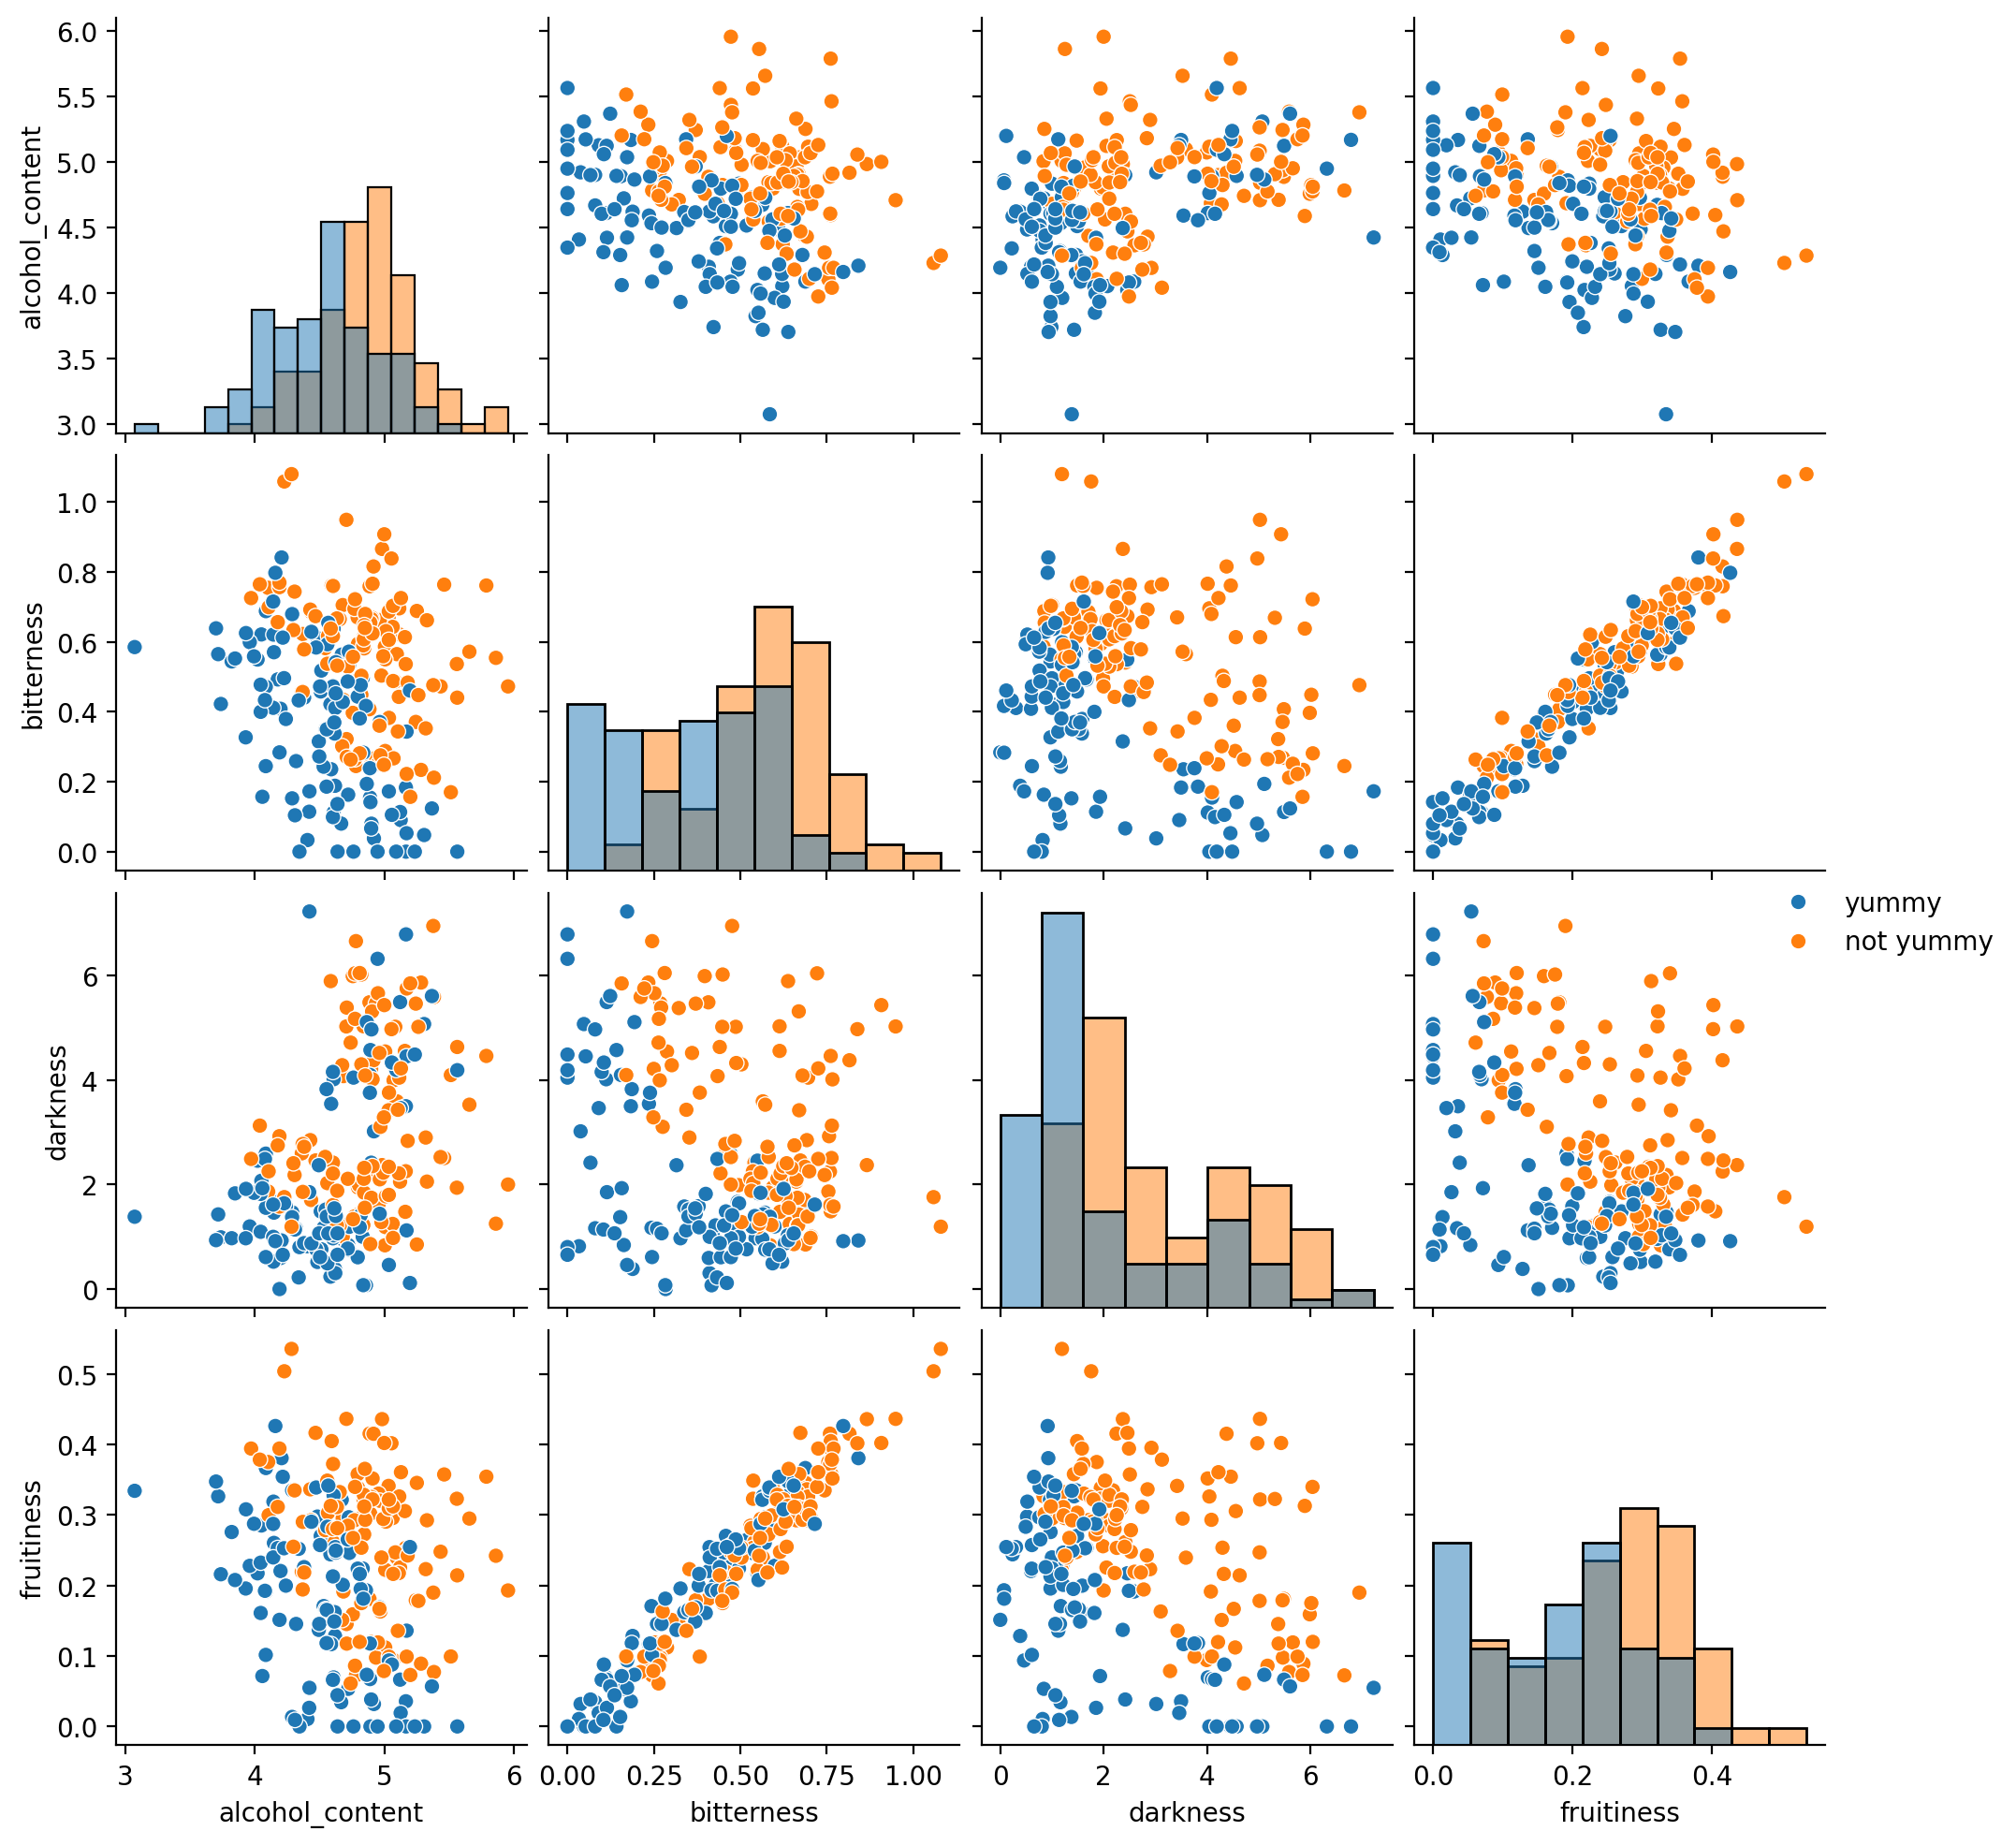

In [32]:
import seaborn as sns
plot = sns.pairplot(beer_data, hue="is_yummy", diag_kind="hist", diag_kws = dict(alpha=.5) );
plot._legend.set_title('')
new_labels = ['yummy', 'not yummy']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

### Prepare data: split features and labels

In [33]:
# all columns up to the last one:
X = beer_data.iloc[:, :-1]
# only the last column:
y = beer_data.iloc[:, -1]

### Start machine learning using scikit-learn

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() 

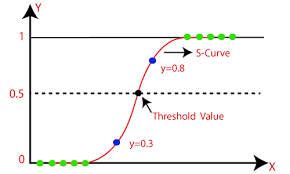

In [35]:
# Fit
classifier.fit(X, y)

# Scores
y_scores = classifier.fit(X, y).predict_proba(X)[:,1]

# Predict
y_pred = classifier.predict(X)

In [37]:
print(len(y), "examples")
print(sum(y_pred == y), "labeled correctly")

225 examples
208 labeled correctly


**Did we proceed correctly?**

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle"></i>
<code>y_pred == y</code> evaluates to a vector of <code>True</code> or <code>False</code> Boolean values. When used as numbers, Python handles <code>True</code> as <code>1</code> and <code>False</code> as <code>0</code>. So, <code>sum(...)</code> simply counts the correctly predicted labels.
</div>


## Metrics for evaluating the performance of a classifier

`sklearn.metrics` contains many metrics like `precision_score` etc., `confusion_matrix` prints what it means.

In [38]:
from sklearn.metrics import (precision_score, confusion_matrix, recall_score, f1_score, precision_recall_curve,
                            ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, roc_curve, auc, roc_auc_score)

After applying a classifier to a data set with known labels `0` and `1`:

<div class="alert alert-block alert-warning">

<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>
<ul>

<li><strong>TP (true positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>1</code>. <br/><br/>


<li><strong>TN (true negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FP (false positives)</strong>: labels which were predicted as <code>1</code> and actually are <code>0</code>.<br/><br/>


<li><strong>FN (false negatives)</strong>: labels which were predicted as <code>0</code> and actually are <code>1</code>.<br/><br/>

</ul>

To memorize this: 

<ul>

<li>The second word "positives"/"negatives" refers to the prediction computed by the classifier.
<li>The first word "true"/"false" expresses if the classification was correct or not.

</ul>

This is the so called <strong>Confusion Matrix</strong>:

<table style="border: 1px; font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
              font-size:110%;">
    <tbody >
        <tr>
            <td style="padding: 10px; background:#f8f8f8;"> </td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted N</td>
            <td style="padding: 10px; background:#f8f8f8;">Predicted P</td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual N</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FP         </td>
        </tr>
        <tr>
            <td style="padding: 10px; background:#f8f8f8;">Actual P</td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">FN         </td>
            <td style="padding: 10px; background:#fcfcfc; text-align:center; font-weight: bold">TP         </td>
        </tr>
    </tbody>
</table>

</div>



- So the total number of predictions can be expressed as `TP` + `FP` + `FN` + `TN`.


- The number of correct predictions is `TP` + `TN`.


- `TP` + `FN` is the number of positive examples in our data set, 


- `FP` + `TN` is the number of negative examples.

- **precision** is computed as <code>TP / (TP + FP)</code>.


- **recall** is computed as <code>TP / (TP + FN)</code>.

- The **F1 score** is computed as <code>F1 = 2 * (precision * recall) / (precision + recall)</code>.


<div class="alert alert-block alert-warning">
<div style="font-size: 150%;"><i class="fa fa-info-circle"></i>&nbsp;Definition</div>

This allows us to define <strong>accuracy</strong> as (<code>TP</code> + <code>TN</code>) / (<code>TP</code> + <code>FP</code> + <code>FN</code> + <code>TN</code>).

</div>



In [39]:
print("{:20s} {:.3f}".format("accuracy", accuracy_score(y, y_pred)))
print("{:20s} {:.3f}".format("balanced accuracy", balanced_accuracy_score(y, y_pred)))

accuracy             0.924
balanced accuracy    0.922


**How is accuracy calculated? In this context, is it a good metric?**

precision            0.905
recall               0.958
f1                   0.931


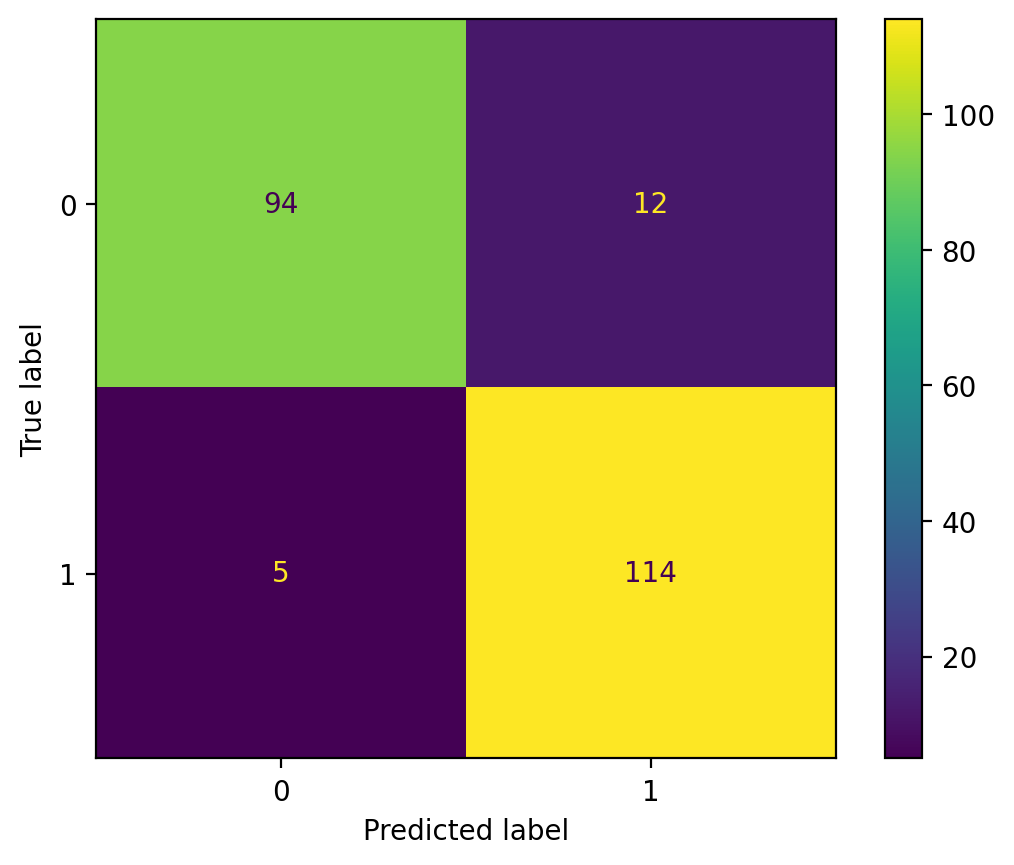

In [41]:
# using the results of the simple classifier of part 1
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# The first argument of the metrics functions is the exact labels, 
# the second argument is the predictions:

print("{:20s} {:.3f}".format("precision", precision_score(y, y_pred)))
print("{:20s} {:.3f}".format("recall", recall_score(y, y_pred)))
print("{:20s} {:.3f}".format("f1", f1_score(y, y_pred)))

**Suppose you want to buy one of these beers, which metric between precision and recall would you rely more on?**

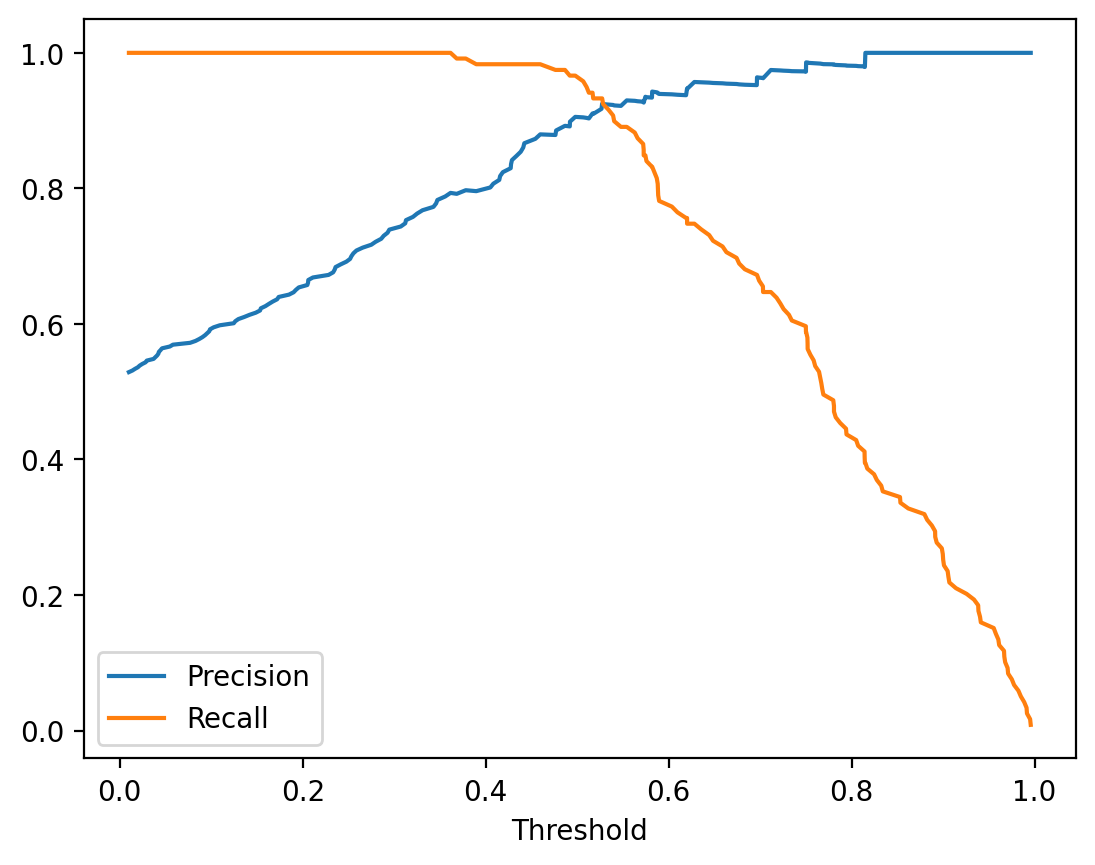

In [42]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

Text(0, 0.5, 'Precision')

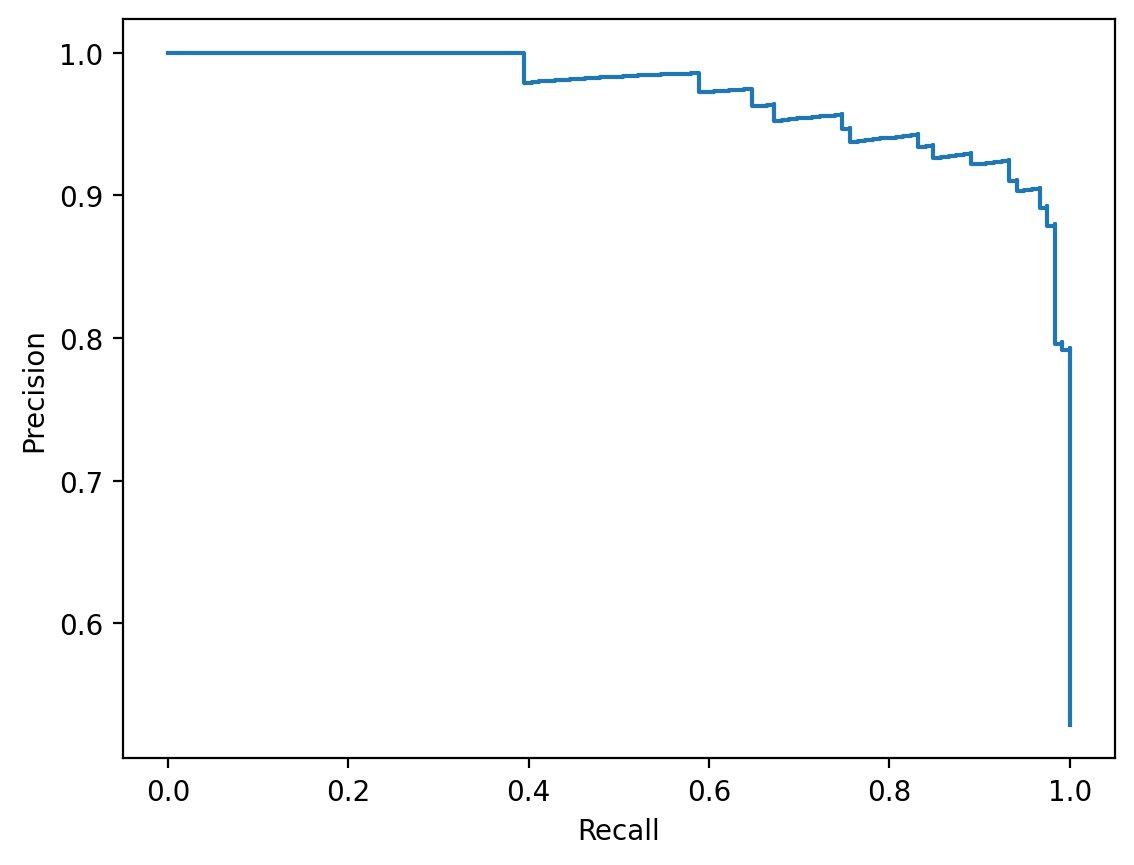

In [43]:
plt.step(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

auc                  0.970


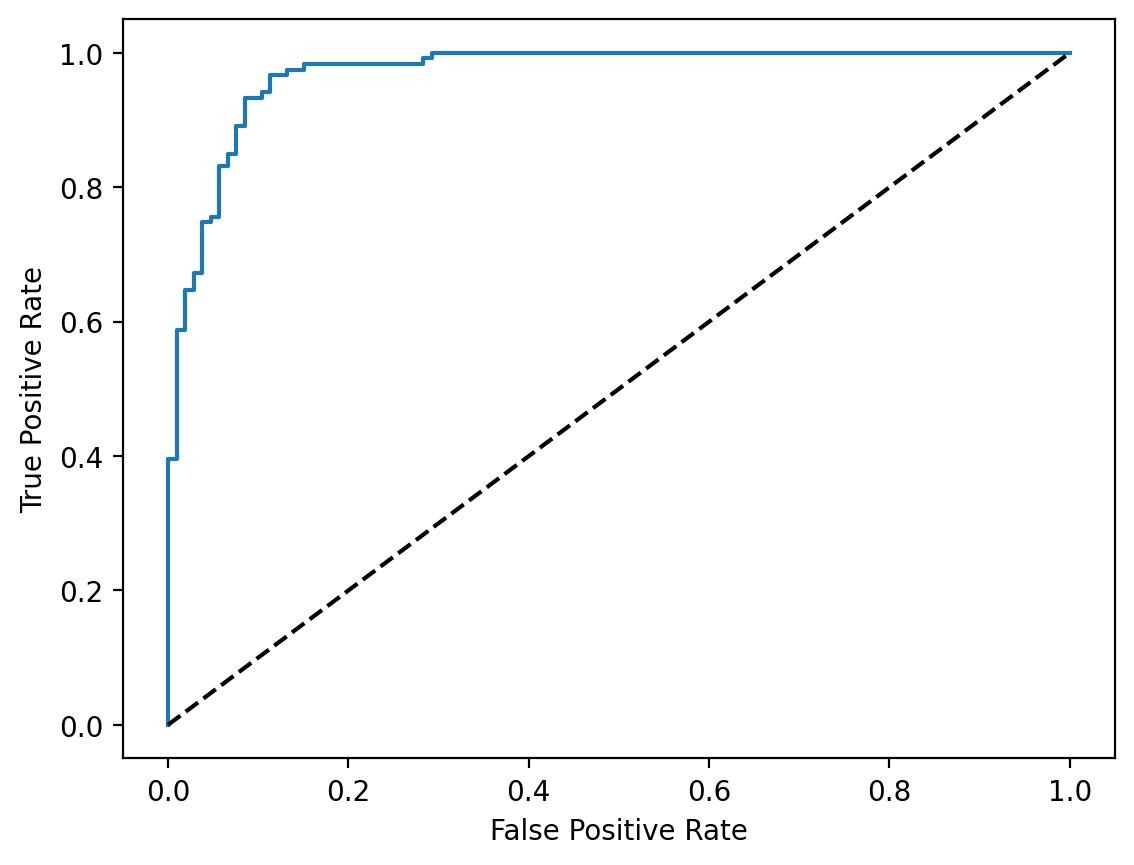

In [45]:
fpr, tpr, thresholds = roc_curve(y, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("{:20s} {:.3f}".format("auc", roc_auc_score(y, y_scores)))

ROC shows trade-offs between sensitivity (false positive rate) and specificity (true positive rate, or recall)

 ### Two helper functions

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def samples_color(ilabels, colors=["steelblue", "chocolate"]):
    '''Return colors list from labels list given as indices.'''
    return [colors[int(i)] for i in ilabels]

def plot_decision_surface(
    features_2d, labels, classifier, preprocessing=None,
    plt=plt, marker='.', N=100, alpha=0.2, colors=["steelblue", "chocolate"], title=None,
    test_features_2d=None, test_labels=None, test_s=60,
):
    '''Plot a 2D decision surface for a already trained classifier.'''

    # sanity check
    assert len(features_2d.columns) == 2

    # pandas to numpy array; get min/max values
    xy = np.array(features_2d)
    min_x, min_y = xy.min(axis=0)
    max_x, max_y = xy.max(axis=0)

    # create mesh of NxN points; tech: `N*1j` is spec for including max value
    XX, YY = np.mgrid[min_x:max_x:N*1j, min_y:max_y:N*1j]
    points = np.c_[XX.ravel(), YY.ravel()] # shape: (N*N)x2

    # apply scikit-learn API preprocessing
    if preprocessing is not None:
        points = preprocessing.transform(points)
    
    # classify grid points
    classes = classifier.predict(points)

    # plot classes color mesh
    ZZ = classes.reshape(XX.shape) # shape: NxN
    plt.pcolormesh(
        XX, YY, ZZ,
        alpha=alpha, cmap=matplotlib.colors.ListedColormap(colors), shading='auto'
    )
    # plot points
    plt.scatter(
        xy[:,0], xy[:,1],
        marker=marker, color=samples_color(labels, colors=colors),
    );
    # set title
    if title:
        if hasattr(plt, 'set_title'):
            plt.set_title(title)
        else:
            plt.title(title)
    # plot test points
    if test_features_2d is not None:
        assert test_labels is not None
        assert len(test_features_2d.columns) == 2
        test_xy = np.array(test_features_2d)
        plt.scatter(
            test_xy[:,0], test_xy[:,1],
            s=test_s, facecolors='none', color=samples_color(test_labels),
        );


In the logistic regression you can choose two main parameters: 

- The type of regularization (as in lasso, ridge or elastic net)
- The strength of the regularization: the regularization weight is passed here in "inverse" and it multiplies the classification loss, not the regularization penalty, meaning that lower values imply stronger regularization:

$$\text{cost} =  \text{C}\cdot\text{classification loss} + \text{regularization penalty}$$

<div class="alert alert-block alert-info">


The <strong>classification loss</strong> in logistic regression is a so called <em>negative-log likelihood</em>, i.e. a negative logarithm of the logistic probability above:


$$\text{classification loss} = -\ell = - \sum_{i=1}^{N} \left( y_{i} \ln(p_i) + (1-y_i)\ln(1-p_i) \right)$$


</div>

In [48]:
from sklearn.model_selection import train_test_split

features_2d = beer_data.loc[:, ("alcohol_content", "bitterness")]
labelv = beer_data["is_yummy"]

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

print('With C=1')
print()

classifier = LogisticRegression(C=1)
y_score=classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

With C=1

train score: 78.57%
test score: 82.46%


Looking at the role of the classification weight parameter:

With C=100

train score: 79.17%
test score: 78.95%


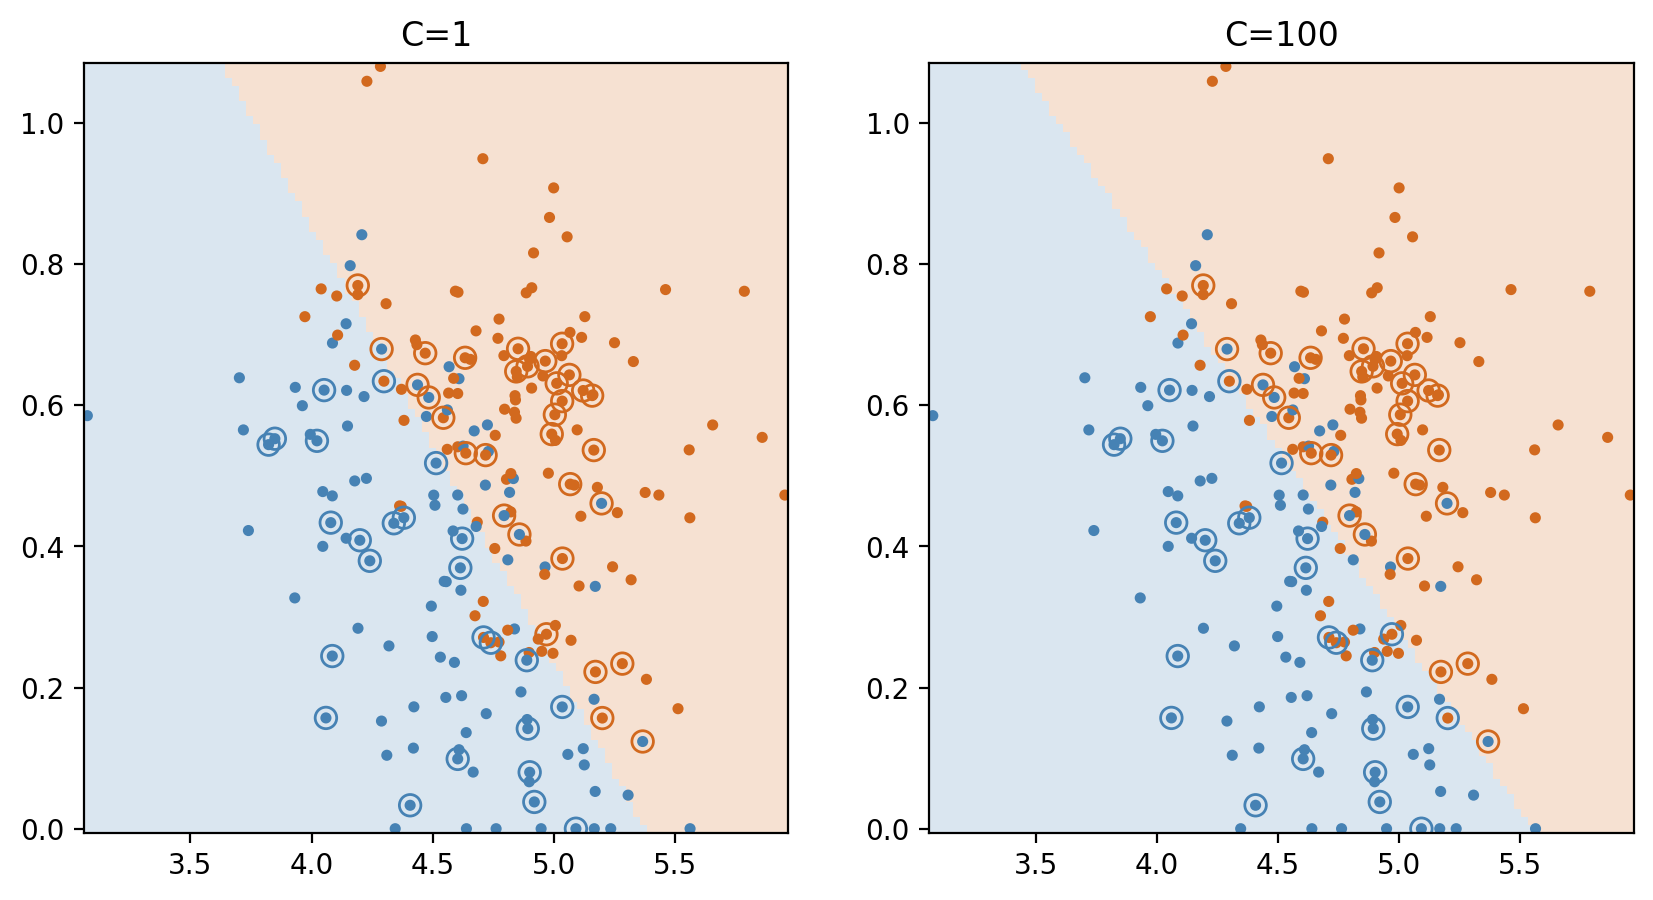

In [49]:
with warnings.catch_warnings(record=True):

    fig, ax_arr = plt.subplots(ncols=2, nrows=1, figsize=(2*5, 5))

    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_test_pred,
        plt=ax_arr[0],
        title='C=1',
    )
    print('With C=100')
    print()

    classifier = LogisticRegression(C=100, random_state=0)
    classifier.fit(X_train, y_train)
    print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
    print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

    y_pred = classifier.predict(X_test)
    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_pred,
        plt=ax_arr[1],
        title='C=100',
    )

About the plot: **the points surrounded by a circle are from the test data set** (not used for learning), all other points belong to the training data. The color of the marker is the true label (blue corresponds to 0 and orange to 1) and the circle is the predicted label.

* `C=100` => the model tries hard to get all training points correctly classified, whereas with 
* `C=1` => we allow misclassification in training, in order to possibly get more general model and avoid overfitting.

In [50]:
C_values = [0.01, 0.1, 1, 10, 100, 1000]
penalty_values = ['l1', 'l2']

print()
for norm in penalty_values:
    print('# Norm ', norm)
    print()
    for C in C_values:
        print('## C: ', C)
        # Note: increase max iterations 10x for solver's convergence
        classifier = LogisticRegression(C=C, penalty=norm, dual=False, max_iter=10000, solver='liblinear')
        classifier.fit(X_train, y_train)
        print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
        # print('weights: ', classifier.coef_[0])
    print()


# Norm  l1

## C:  0.01
test score: 50.88%
## C:  0.1
test score: 49.12%
## C:  1
test score: 78.95%
## C:  10
test score: 78.95%
## C:  100
test score: 78.95%
## C:  1000
test score: 78.95%

# Norm  l2

## C:  0.01
test score: 49.12%
## C:  0.1
test score: 56.14%
## C:  1
test score: 64.91%
## C:  10
test score: 78.95%
## C:  100
test score: 80.70%
## C:  1000
test score: 78.95%



## An overview of classifiers

## Nearest Neighbors

The idea is very simple: to classify a sample $x$ look for **$N$ closests samples in the training data** (by default, using the Euclidean distance) and take **majority of their labels** as a result.

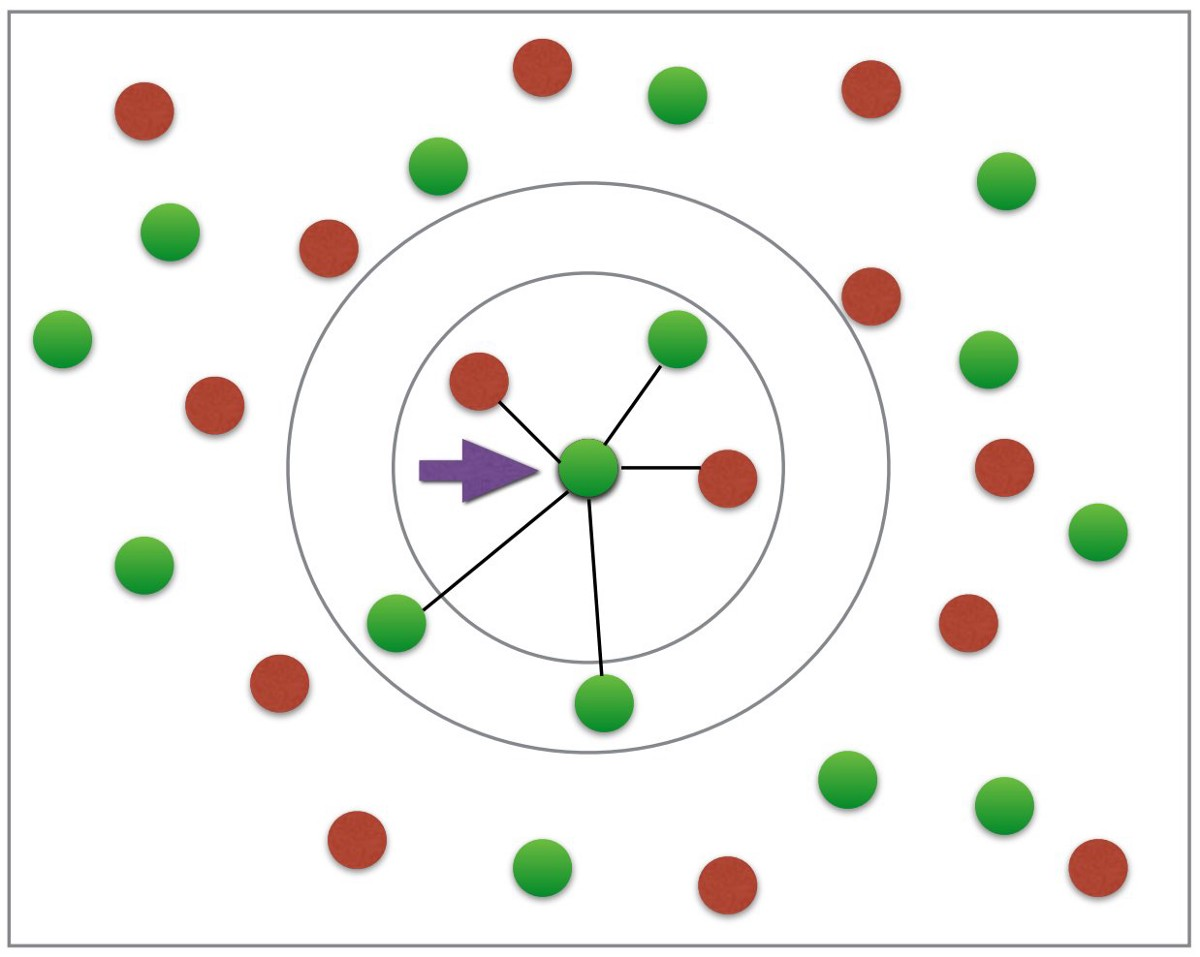

train score: 87.50%
test score: 78.95%


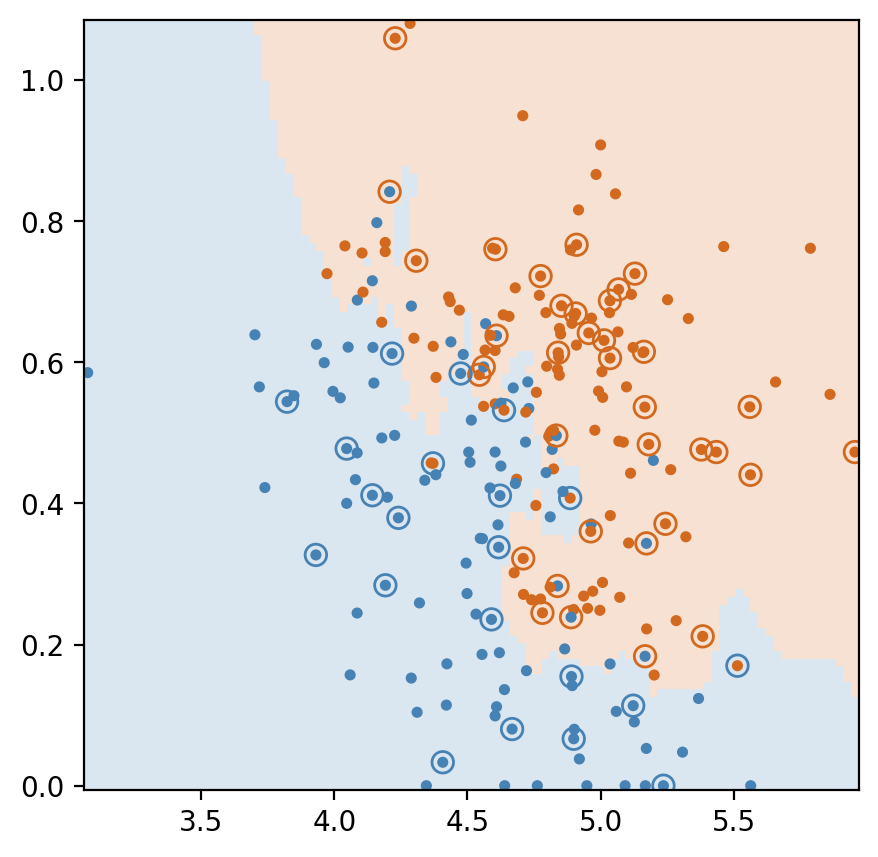

In [51]:
with warnings.catch_warnings(record=True):

    from sklearn.neighbors import KNeighborsClassifier

    X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=10)

    # Let's use 5 neighbors to learn
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)

    print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
    print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
    y_pred = classifier.predict(X_test)
    y_train_pred = classifier.predict(X_train)
    plt.figure(figsize=(5, 5))
    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_pred,
    )

In [52]:
print('F1 score on training: {:.2f}%'.format(100*f1_score(y_train, y_train_pred)))
print('F1 score on test: {:.2f}%'.format(100*f1_score(y_test, y_pred)))

F1 score on training: 88.14%
F1 score on test: 82.35%


Changing the parameters:


# Distance  1

## Nb neighbors:  1
test score: 73.68%


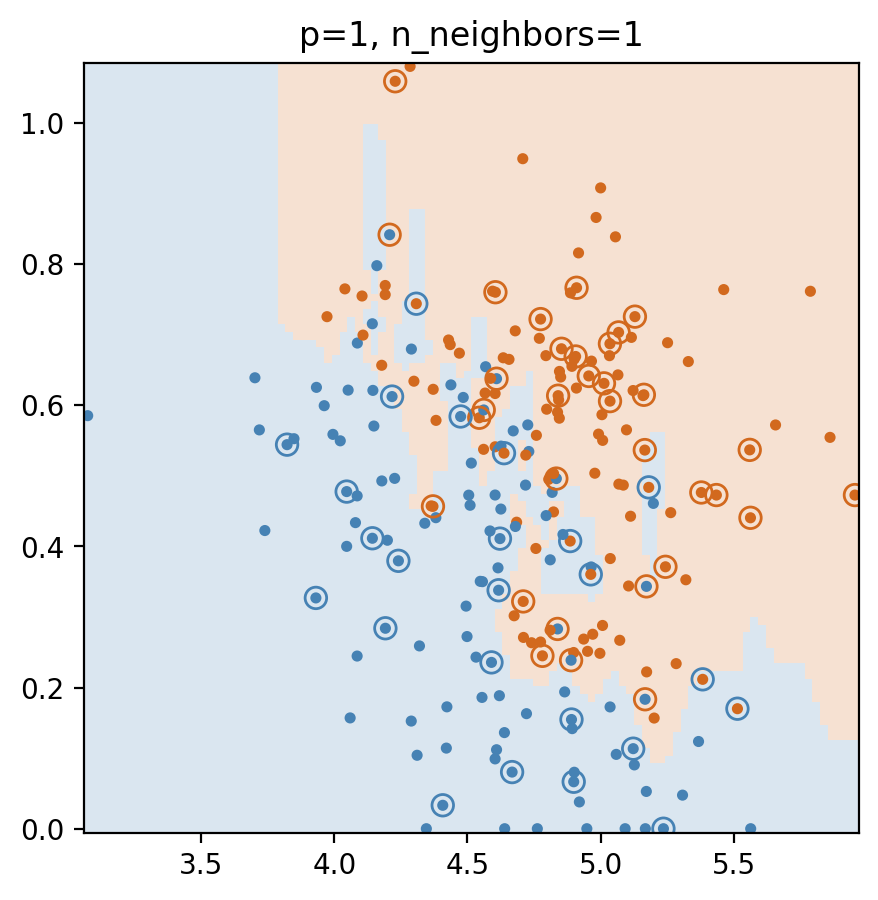

## Nb neighbors:  10
test score: 78.95%


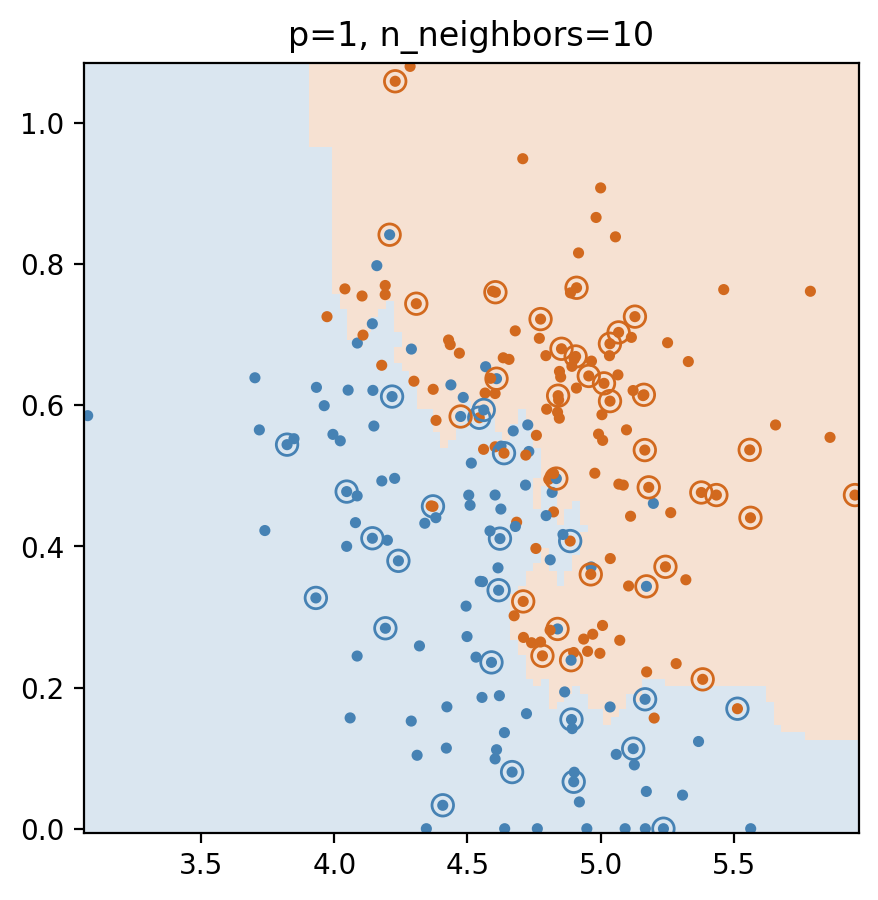

## Nb neighbors:  100
test score: 71.93%


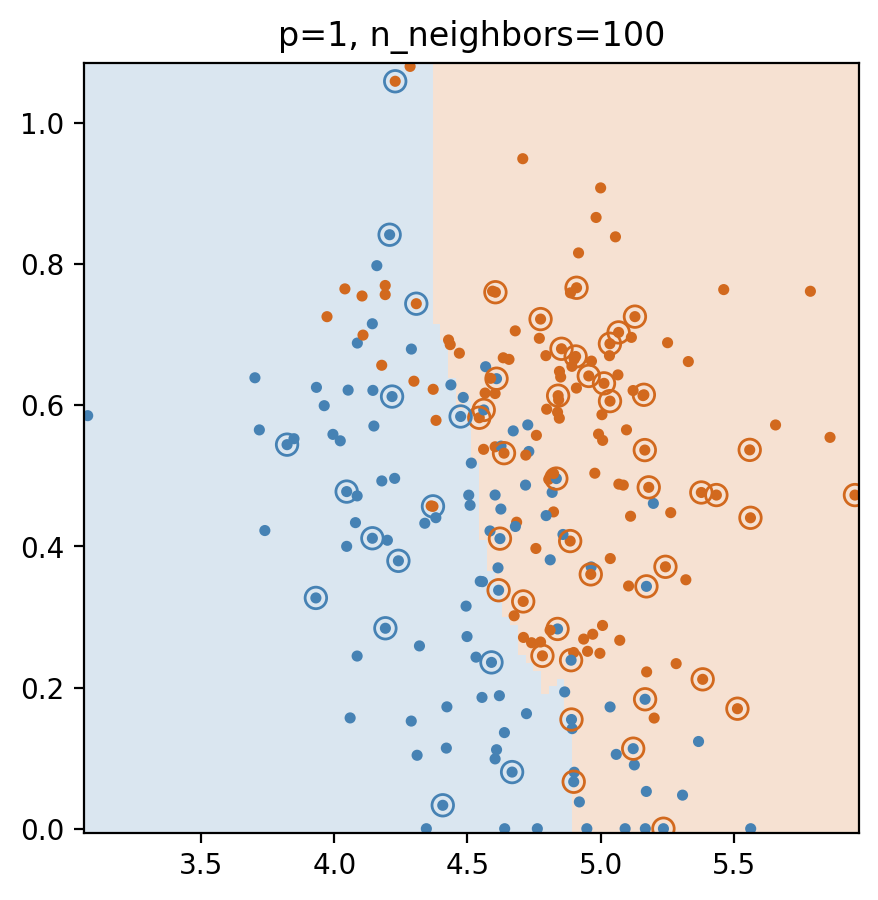


# Distance  2

## Nb neighbors:  1
test score: 73.68%


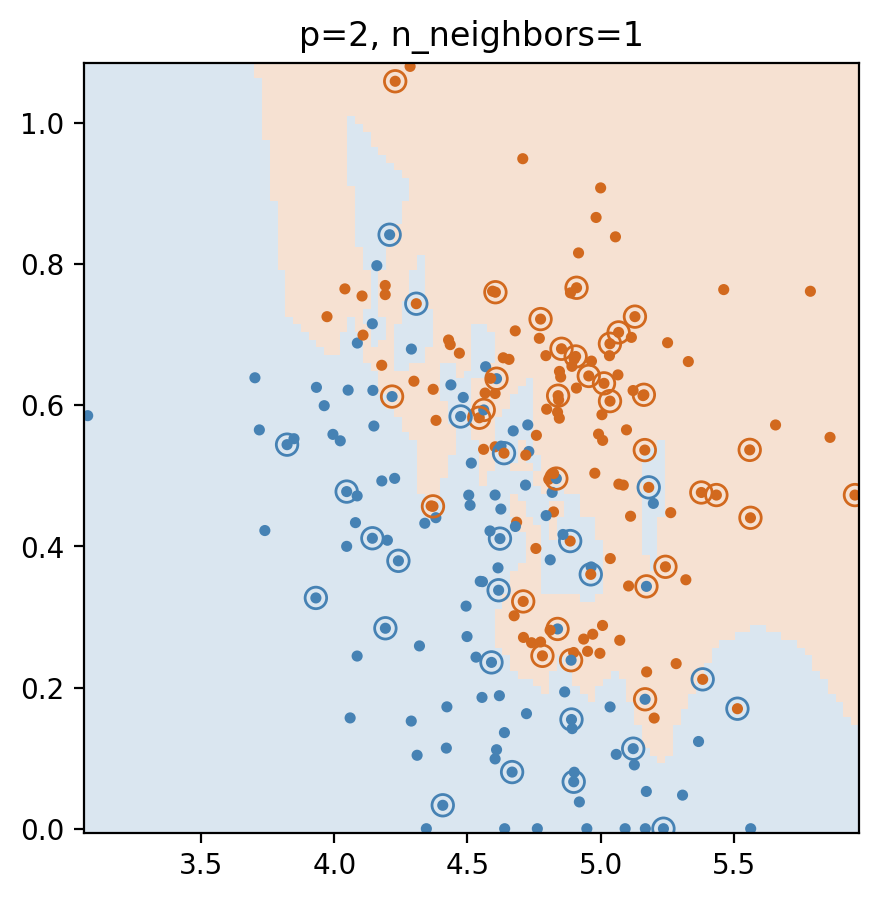

## Nb neighbors:  10
test score: 73.68%


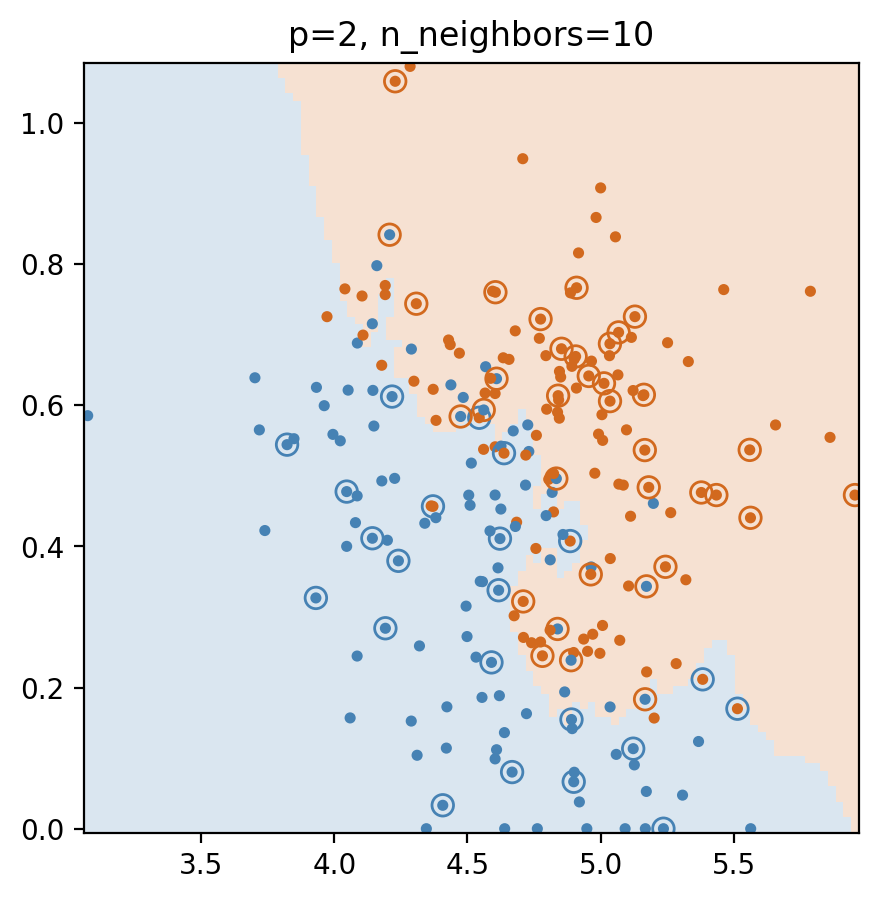

## Nb neighbors:  100
test score: 75.44%


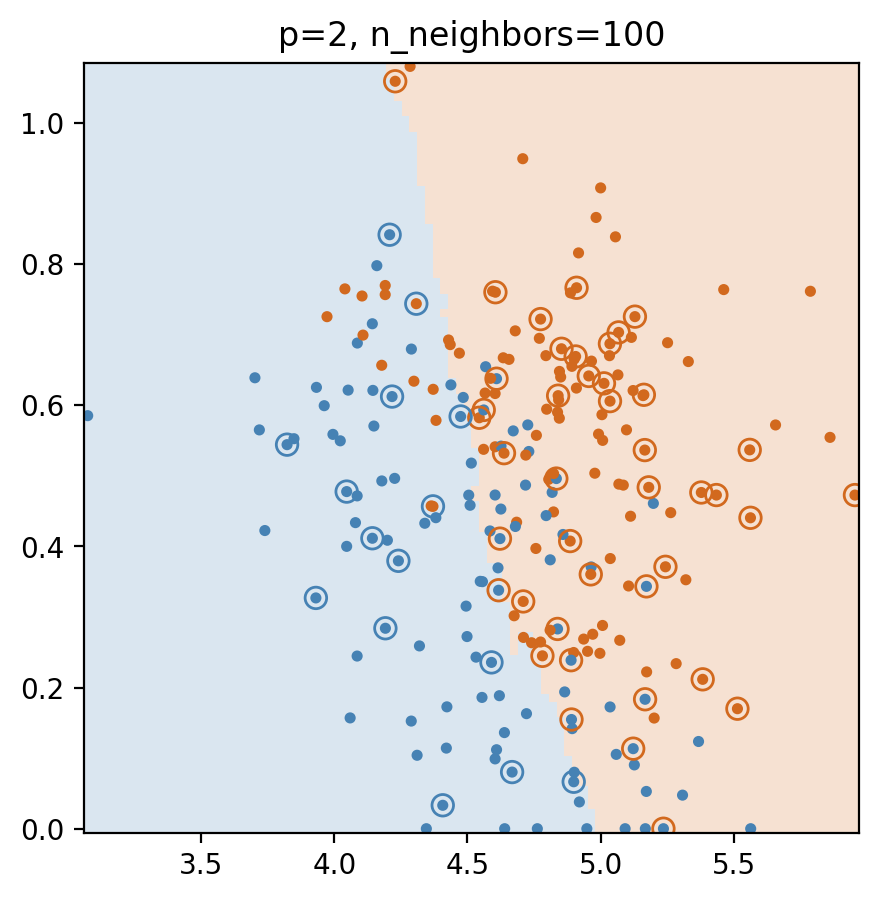

In [53]:
with warnings.catch_warnings(record=True):

    n_neighbors_list = [1, 10, 100]
    p_list = [1, 2] #1=Manhatan distance norm ; 2=Euclidian distance

    print()
    for p in p_list:
        print('# Distance ', p)
        print()
        for n_neighbors in n_neighbors_list:
            print('## Nb neighbors: ', n_neighbors)
            # Note: increase max iterations 10x for solver's convergence
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
            classifier.fit(X_train, y_train)
            print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
            # print('weights: ', classifier.coef_[0])
            y_pred = classifier.predict(X_test)
            plt.figure(figsize=(5, 5))
            plt.title("p={}, n_neighbors={}".format(p, n_neighbors))
            plot_decision_surface(
                features_2d, labelv, classifier,
                test_features_2d=X_test, test_labels=y_pred,
            )
            plt.show()
        print()

## Ensembles and XGBoost

In [54]:
from sklearn.datasets import load_iris
iris = load_iris()
features = pd.DataFrame(data = np.c_[iris.data,iris.target], columns = iris.feature_names + ['label'])
features.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

### Random Forest Model

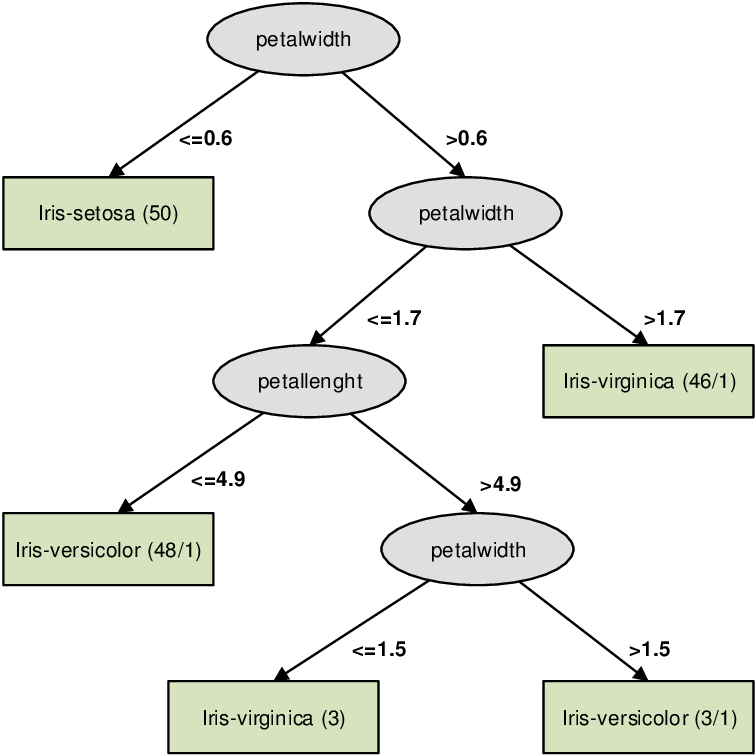

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=0)

In [56]:
from sklearn.metrics import accuracy_score

# Fit
classifier.fit(X_train, Y_train)

# Predict
y_pred = classifier.predict(X_test)

print(accuracy_score(Y_test, y_pred))

0.9777777777777777


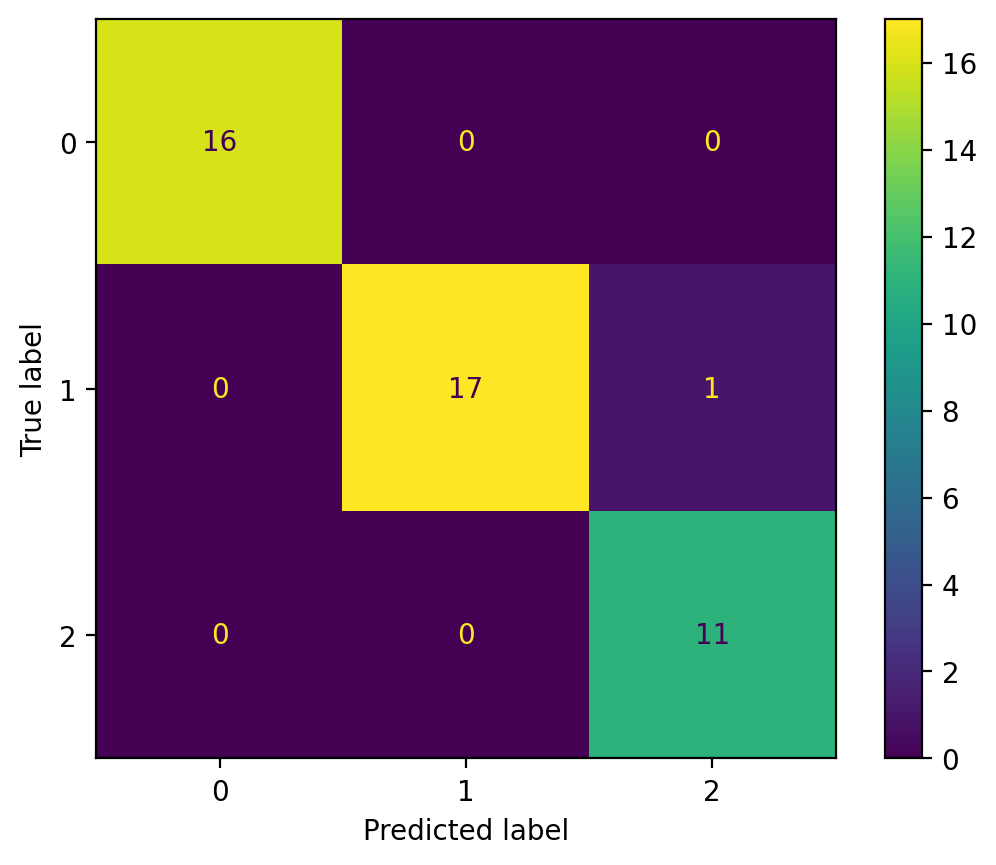

In [57]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [58]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, Y_train)

y_pred2 = rnd_clf.predict(X_test)

print(accuracy_score(Y_test,y_pred2))

0.9777777777777777


### Feature Importance

In [59]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


## Gradient Boosting with xgboost

In [30]:
# please install before proceeding
# !pip install xgboost

In [63]:
from sklearn.datasets import fetch_california_housing
raw_data = fetch_california_housing()
print(raw_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [64]:
housing_data = pd.DataFrame(raw_data.data, columns=raw_data['feature_names'])
X, y = housing_data.iloc[:,:], raw_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=123)

eval_set = [(X_val, y_val)]

In [65]:
y_train

array([1.042, 1.321, 0.979, ..., 2.862, 4.125, 0.593])

In [66]:
import xgboost as xgb

### Main Hyperparameters:

* learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
* max_depth: determines how deeply each tree is allowed to grow during any boosting round.
* subsample: percentage of samples used per tree. Low value can lead to underfitting.
* colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
* n_estimators: number of trees you want to build.
* objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
* eval_metric: evaluation metrics for validation data

### Regularization Parameters:

* gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
* alpha: L1 regularization on leaf weights. A large value leads to more regularization.
* lambda: L2 regularization on leaf weights and is smoother than L1 regularization.


In [67]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10,
                          early_stopping_rounds=10)

In [68]:
xg_reg.fit(X_train,y_train, eval_set=eval_set, verbose=True)
preds = xg_reg.predict(X_test)

[0]	validation_0-rmse:1.08165
[1]	validation_0-rmse:1.02406
[2]	validation_0-rmse:0.97391
[3]	validation_0-rmse:0.92716
[4]	validation_0-rmse:0.88596
[5]	validation_0-rmse:0.84830
[6]	validation_0-rmse:0.81541
[7]	validation_0-rmse:0.78776
[8]	validation_0-rmse:0.76256
[9]	validation_0-rmse:0.73964


In [69]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.740663


In [70]:
# back to classification
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=0)

In [71]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9777777777777777


## k-fold cross validation

In [85]:
from xgboost import DMatrix
data_dmatrix = DMatrix(data=X,label=y)

* num_boost_round: denotes the number of trees you build (analogous to n_estimators)
* metrics: tells the evaluation metrics to be watched during CV
* as_pandas: to return the results in a pandas DataFrame.
* early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
* seed: for reproducibility of results.

In [88]:
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=10,
                    num_boost_round=10,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

In [89]:
cv_results

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         1.094033        0.002553        1.094599       0.022836
1         1.063207        0.002492        1.064191       0.022510
2         1.059808        0.002509        1.061178       0.022582
3         1.032145        0.002296        1.034345       0.021544
4         1.001889        0.001486        1.004443       0.021723
5         0.992499        0.001447        0.995682       0.021688
6         0.970664        0.001247        0.974676       0.020662
7         0.931104        0.001355        0.935370       0.020661
8         0.929646        0.001398        0.934340       0.020794
9         0.912989        0.001352        0.918066       0.020571

## Visualize the Trees

In [90]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [43]:
# please install before proceeding
# !pip install graphviz

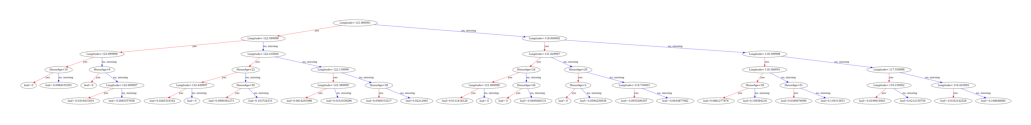

In [91]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg, num_trees=1)
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

In [92]:
# we can also save the tree to look at it in more detail
image = xgb.to_graphviz(xg_reg, num_trees=1)
image.graph_attr = {'dpi':'400'}
image.render('xgb_reg', format = "png")

'xgb_reg.png'

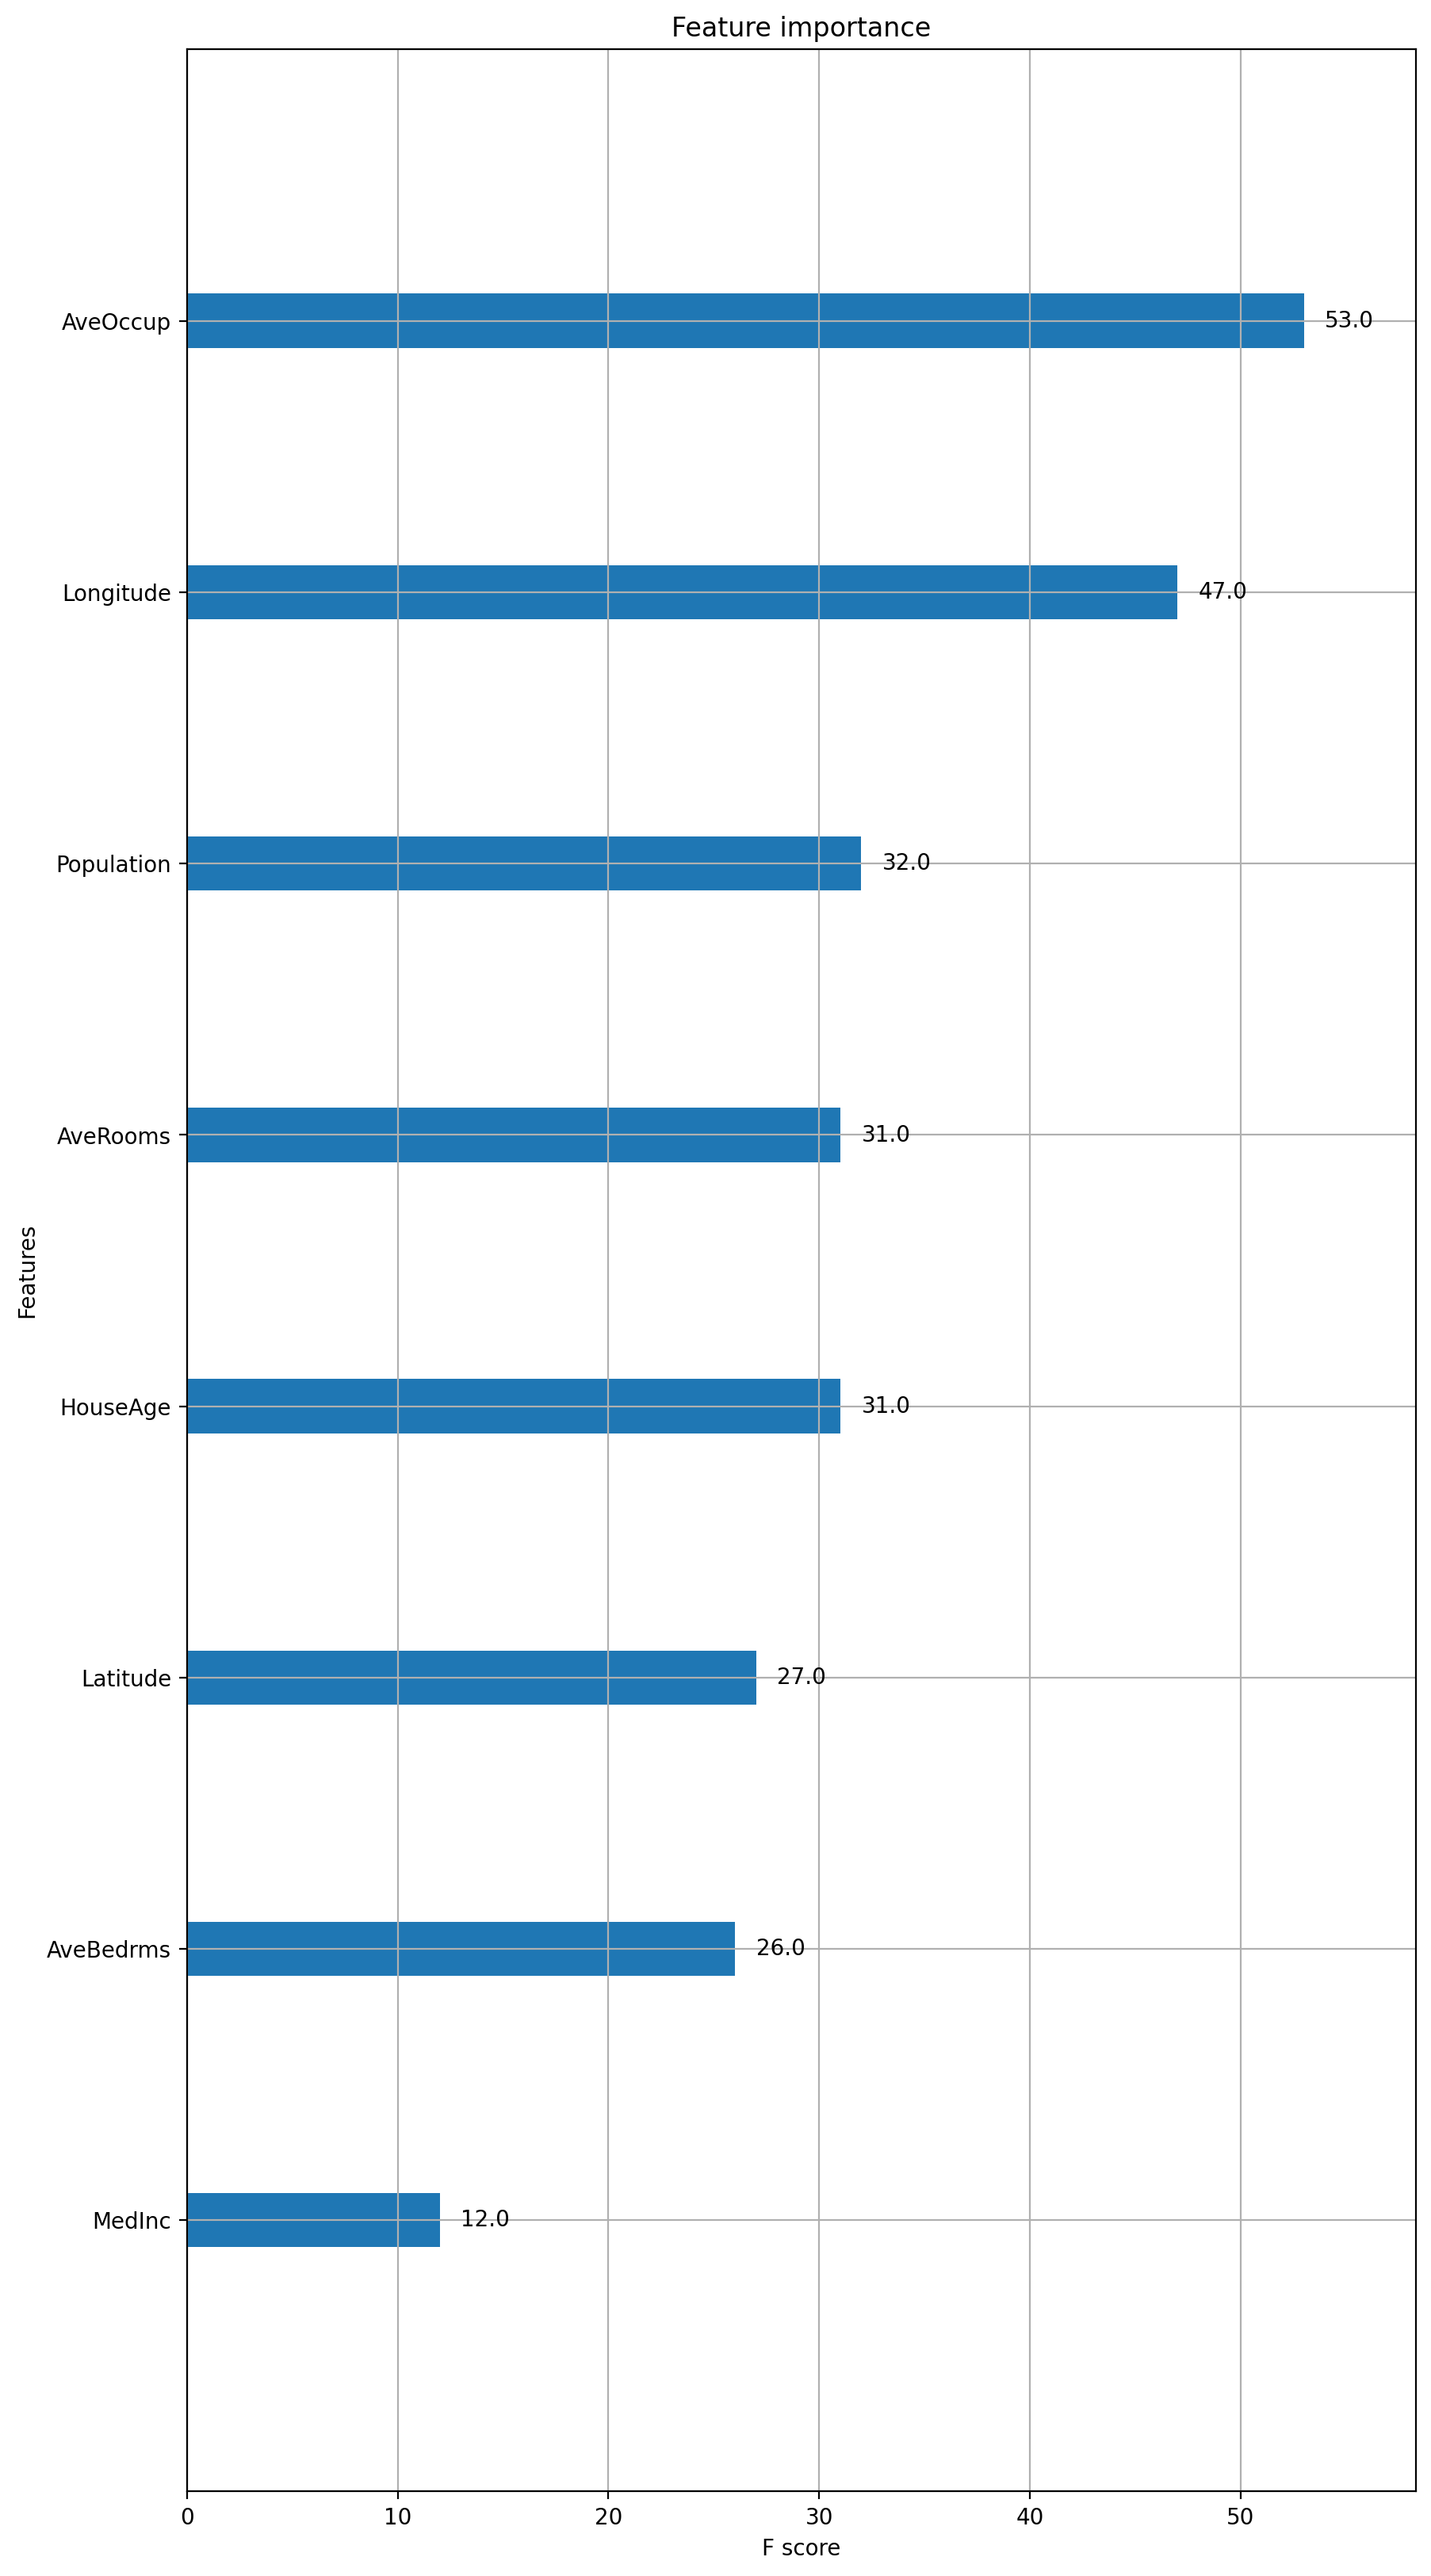

In [93]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Deep Learning - Core Content

This second part of the notebook focuses on the structure of neural networks, how to build and compile one, and how to add different layers and features to the NN. Throught the notebook we will focus again on the task of predicting house prices from house features.

## Steps of Backpropagation 

1. Forward pass: makes prediction from the input to the output layer
2. Error Measurement: using a loss function it compares the desired output and the actual output of the network and returns some measure of error
3. Reverse pass: going backward computes how much each connection contributed to the error, until reaching the input layer
4. Gradient Descent step: tweaks the connection weights to reduce the error

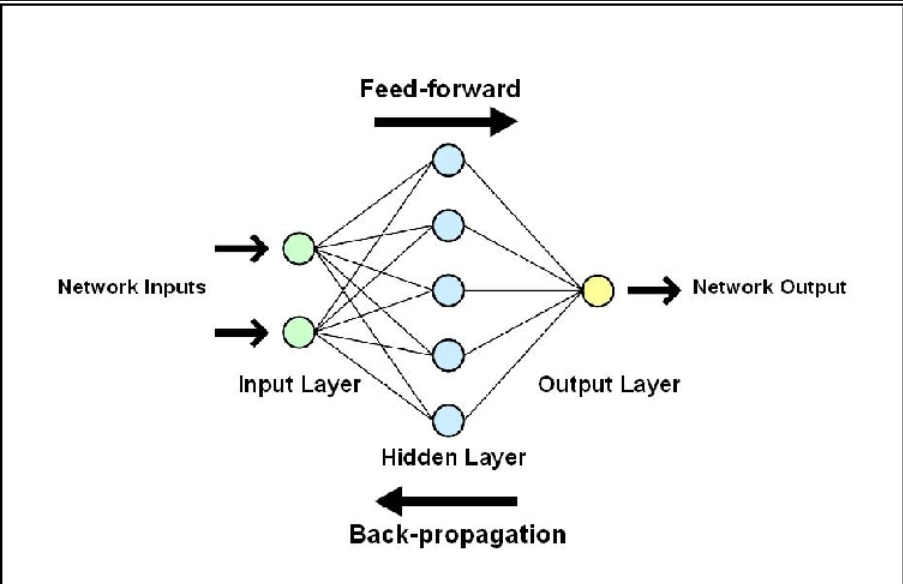

## Building a Network

- 1 input layer + 1 or more hidden layers + 1 output layer
- \# input neurons = \# features 
- \# hidden layers = typically from 1 to 5 
- \# neurons per layer = typycally from 10 to 100
- hidden activation: ReLU
- \# output layers, output activation, loss function: depends on the problem 

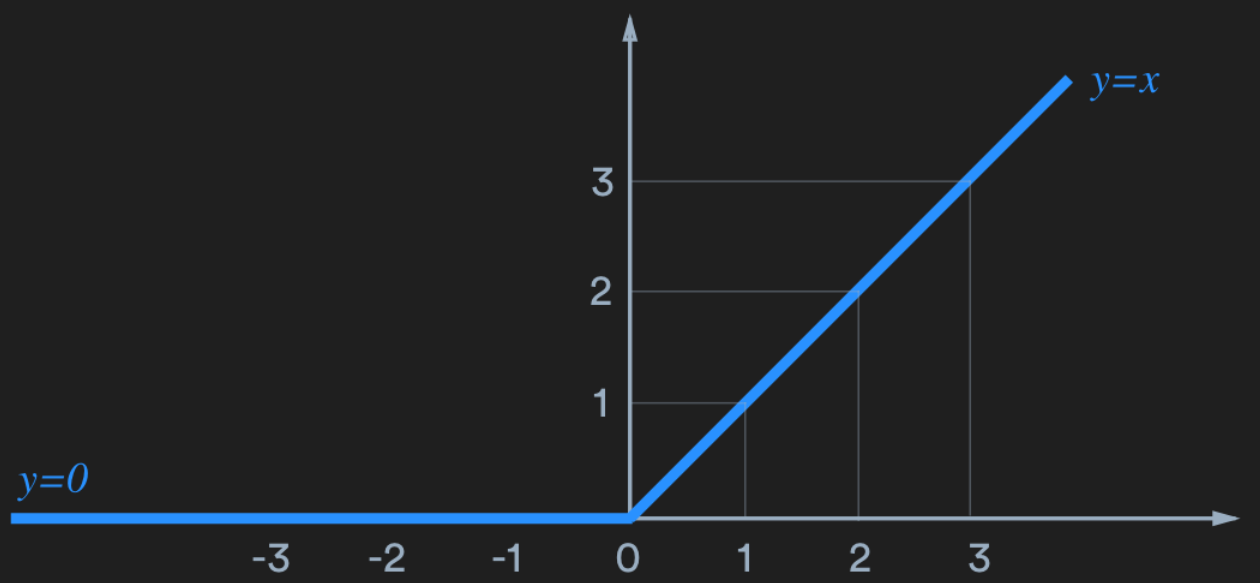

## Continuous Outcomes

In [60]:
# start by installing pytorch following the instructions from: https://pytorch.org/get-started/locally/

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import copy

In [95]:
# if we want to control the randomness
# torch.manual_seed(92)

In [96]:
from sklearn.datasets import fetch_california_housing
raw_data = fetch_california_housing()
#print(raw_data.DESCR)

In [97]:
df = pd.DataFrame(raw_data.data, columns=raw_data['feature_names'])
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [98]:
# the dependent variable is ln(median house value)
raw_data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [99]:
# split our data
X, y = df.iloc[:,:], raw_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Size of training data {X_train.shape}")
print(f"Size of validation data {X_val.shape}")
print(f"Size of test data {X_test.shape}")

Size of training data (16512, 8)
Size of validation data (2064, 8)
Size of test data (2064, 8)


In [100]:
# before bulding the model we will transform all our data to tensors
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

In [102]:
# NN training benefits greatly from having a GPU (in case you have one)
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
        )

print(f"Using {device} device")

Using cpu device


Since our target variable is continuous we need to be carefully when defining the following components of our network:

- \# output neurons (neurons on the last layer of the network): 1
- output activation function: none
- loss function: MSE or Mean Absolute Error

In [103]:
# we define our model as a sequence of steps
# good reference: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
model = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=30),
    nn.ReLU(),
    nn.Linear(30, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
)

In [104]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
)


In [105]:
#pip install torchsummary
from torchsummary import summary
summary(model, X.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 20640, 30]             270
              ReLU-2            [-1, 20640, 30]               0
            Linear-3            [-1, 20640, 15]             465
              ReLU-4            [-1, 20640, 15]               0
            Linear-5             [-1, 20640, 1]              16
Total params: 751
Trainable params: 751
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.63
Forward/backward pass size (MB): 14.33
Params size (MB): 0.00
Estimated Total Size (MB): 14.96
----------------------------------------------------------------


In [106]:
# can our model handle our data?
random_results = model(X_train)
random_results.shape

torch.Size([16512, 1])

In [107]:
# define the loss function (https://pytorch.org/docs/stable/nn.html#loss-functions)
# and the optimizer (https://pytorch.org/docs/stable/optim.html)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), 
                       lr=0.001)

/home/yabra/.local/lib/python3.10/site-packages/torch/distributed/distributed_c10d.py:347: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(


### Training loop

We now setup our own training loop. We will iterate multiple times over our training data (i.e. multiple epochs) and, in each iteration, we will estimate the gradient and update the parameters using batches of the training data. This approach is known as **mini batch gradient descent**. 

At the end of every epoch we will evaluate our model on the evaluation dataset and will choose the best model according to this evaluation.

In [108]:
# create objects for logging
history_val = []
history_train = []

# hold the best model
best_loss = np.inf   # init to infinity
best_weights = None
best_epoch = 0

# set main parameters for training
n_epochs = 50
batch_size = 32

for epoch in range(n_epochs):
    
    for i in range(0, len(X_train), batch_size):
        # take a batch
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()

    # evaluate model at end of each epoch
    model.eval()
    y_pred_train = model(X_train)
    loss_train = loss_function(y_pred_train, y_train)
    loss_train = float(loss_train)
    history_train.append(loss_train)

    y_pred_val = model(X_val)
    loss_val = loss_function(y_pred_val, y_val)
    loss_val = float(loss_val)
    history_val.append(loss_val)
    if loss_val < best_loss:
        best_loss = loss_val
        best_epoch = epoch
        best_weights = copy.deepcopy(model.state_dict())

    # print some information
    if epoch % 10 == 0:
        print(f'Finished epoch {epoch}, training loss: {np.round(loss_train, 2)}, validation loss: {np.round(loss_val, 2)}')

Finished epoch 0, training loss: 1.21, validation loss: 1.19
Finished epoch 10, training loss: 0.72, validation loss: 0.73
Finished epoch 20, training loss: 0.65, validation loss: 0.67
Finished epoch 30, training loss: 0.57, validation loss: 0.59
Finished epoch 40, training loss: 0.53, validation loss: 0.55


In [109]:
best_epoch, best_loss

(46, 0.5260506868362427)

In [110]:
# restore model to its state with the lowest validation loss
model.load_state_dict(best_weights)

<All keys matched successfully>

In [111]:
# can I recover the best MSE?
y_pred = model(X_val)
mse_val = loss_function(y_pred, y_val)
mse_val = float(mse_val)
mse_val # of course!

0.5260506868362427

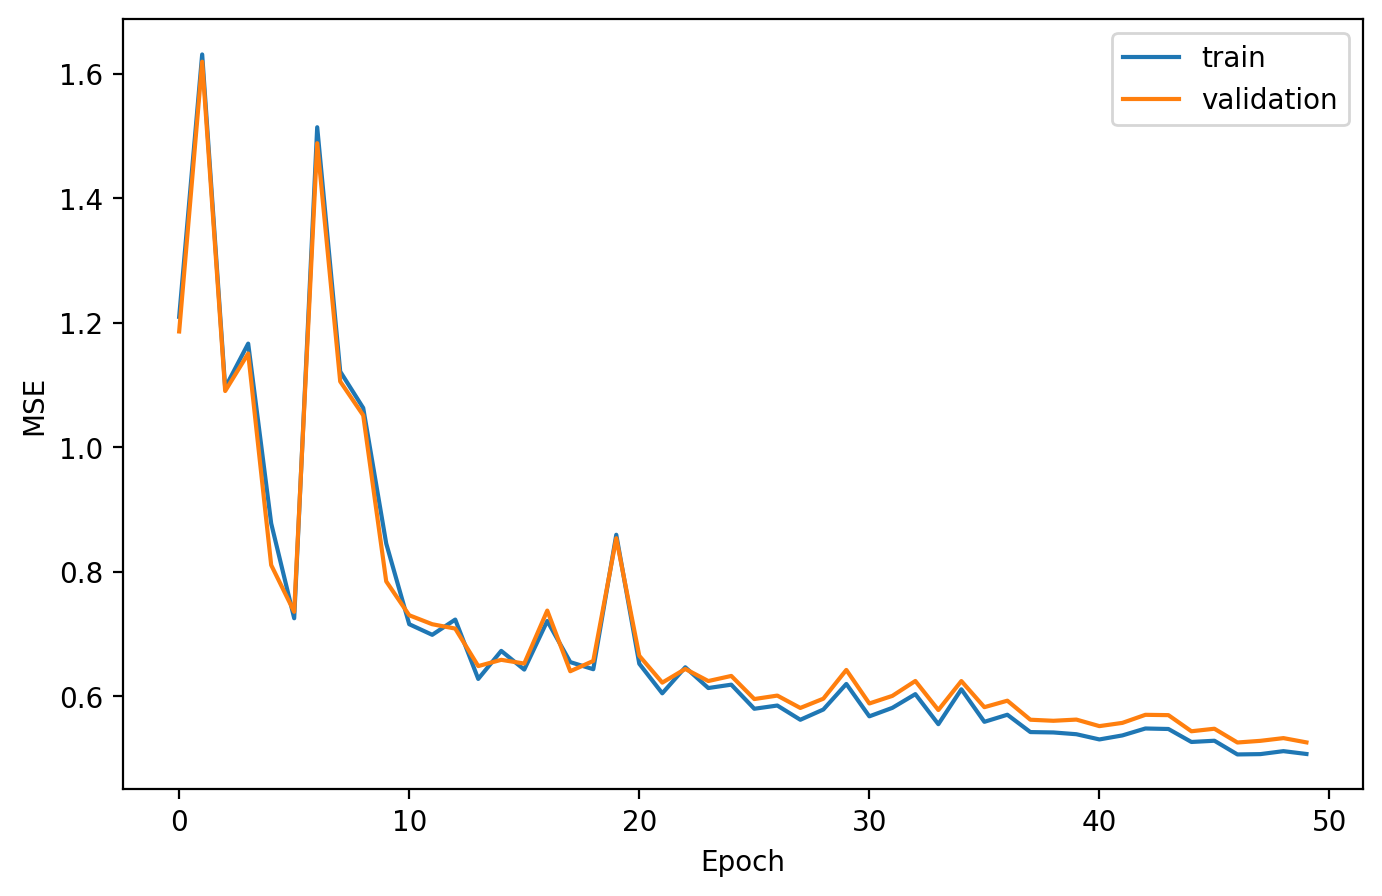

In [112]:
# plot performance by epoch
plt.figure(figsize=(8,5))
plt.plot(history_train, label="train")
plt.plot(history_val, label="validation")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [81]:
# more sophisticated ways of tracking model performance
# 1. Use tqdm library
# 2. Tensorboard: https://pytorch.org/docs/stable/tensorboard.html

In [113]:
# get names and parameters for each layer of our model
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)
        #print(param.data)  # we could access the parameteres if we needed

0.weight
0.bias
2.weight
2.bias
4.weight
4.bias


Test MSE: 0.5299999713897705


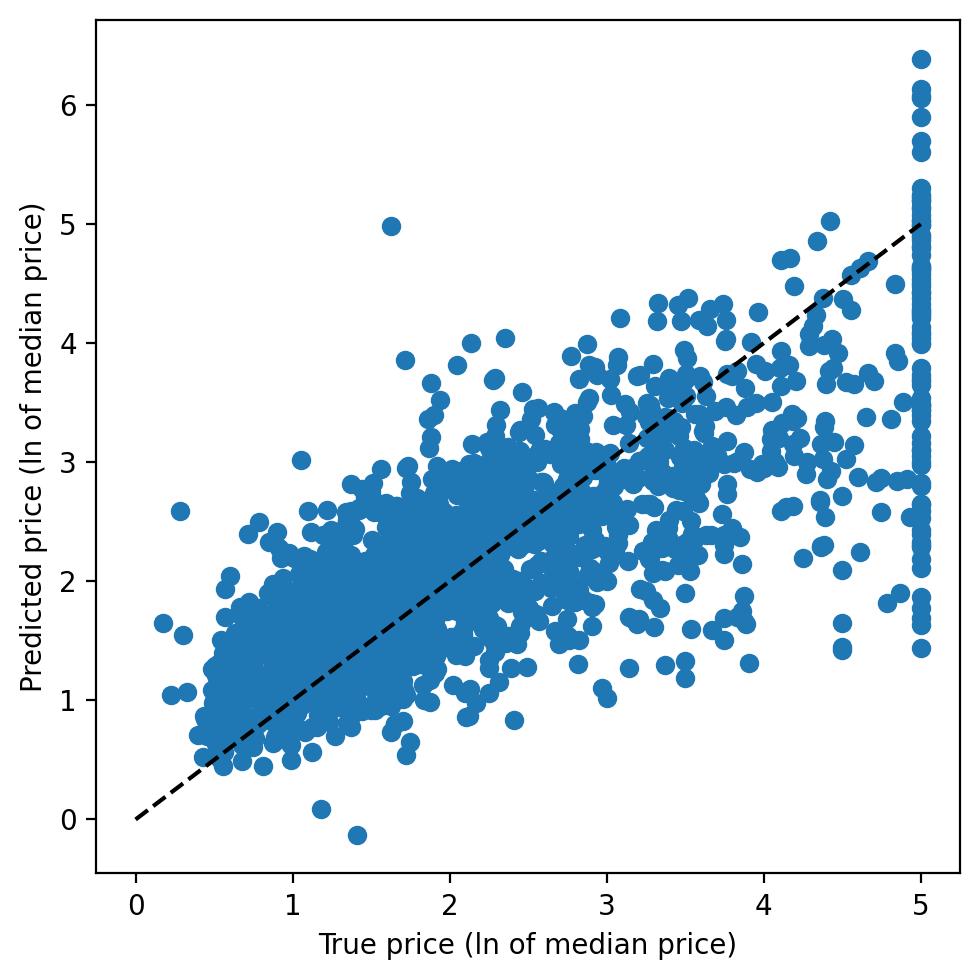

In [115]:
# get predictions for test data
with torch.no_grad():
  y_pred = model(X_test)

# calculate mse
loss_test = loss_function(y_pred, y_test)
print(f"Test MSE: {np.round(loss_test, 2)}")

# compare predictions to actual data
plt.scatter(y_test, y_pred)
plt.plot([0, 5], [0, 5], '--k')
plt.xlabel('True price (ln of median price)')
plt.ylabel('Predicted price (ln of median price)')
plt.tight_layout()
plt.show()

## Binary Classification

In [116]:
beer_data = pd.read_csv("https://www.dropbox.com/s/5fbmj4gqktrmn00/beers.csv?dl=1")
X, y = beer_data.iloc[:, :-1], beer_data.iloc[:, -1]
X.head(5)

alcohol_content  bitterness  darkness  fruitiness
0         3.739295    0.422503  0.989463    0.215791
1         4.207849    0.841668  0.928626    0.380420
2         4.709494    0.322037  5.374682    0.145231
3         4.684743    0.434315  4.072805    0.191321
4         4.148710    0.570586  1.461568    0.260218

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Size of training data {X_train.shape}")
print(f"Size of validation data {X_val.shape}")
print(f"Size of test data {X_test.shape}")

Size of training data (180, 4)
Size of validation data (22, 4)
Size of test data (23, 4)


In [118]:
# before bulding the model we will transform all our data to tensors
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.float32).reshape(-1, 1)

Since our target variable is **binary** we need to be carefully when defining the following components of our network:

- \# output neurons: 1
- output activation function: Logistic
- loss function: binary_crossentropy

Reference to understand loss functions for binary prediction [here](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) 

In [119]:
# we define our model as a sequence of steps
model = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=50),
    nn.ReLU(),
    nn.Linear(50, 25),
    nn.ReLU(),
    nn.Linear(25, 1),
    nn.Sigmoid()
)

In [120]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=25, bias=True)
  (3): ReLU()
  (4): Linear(in_features=25, out_features=1, bias=True)
  (5): Sigmoid()
)


In [121]:
#pip install torchsummary
from torchsummary import summary
summary(model, X.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 225, 50]             250
              ReLU-2              [-1, 225, 50]               0
            Linear-3              [-1, 225, 25]           1,275
              ReLU-4              [-1, 225, 25]               0
            Linear-5               [-1, 225, 1]              26
           Sigmoid-6               [-1, 225, 1]               0
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.26
Params size (MB): 0.01
Estimated Total Size (MB): 0.27
----------------------------------------------------------------


In [122]:
# can our model handle our data?
random_results = model(X_train)
random_results.shape

torch.Size([180, 1])

In [123]:
# define the loss function (https://pytorch.org/docs/stable/nn.html#loss-functions)
# and the optimizer (https://pytorch.org/docs/stable/optim.html)
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), 
                       lr=0.001)

In [124]:
# import additional metrics for binary classifiation
from sklearn.metrics import accuracy_score

### Training loop

Same logic as before

In [125]:
# create objects for logging
history_val_loss = []
history_train_loss = []
history_val_acc = []
history_train_acc = []

# hold the best model
best_loss = np.inf   # init to infinity
best_weights = None
best_epoch = 0

# set main parameters for training
n_epochs = 50
batch_size = 8

for epoch in range(n_epochs):
    
    for i in range(0, len(X_train), batch_size):
        # take a batch
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()
    

    # evaluate model at end of each epoch
    model.eval()
    
    y_pred_train_probs = model(X_train)
    y_pred_train = torch.where(y_pred_train_probs > 0.5, 1, 0)

    y_pred_val_probs = model(X_val)
    y_pred_val = torch.where(y_pred_val_probs > 0.5, 1, 0)
    
    loss_train = loss_function(y_pred_train_probs, y_train)
    loss_train = float(loss_train)
    history_train_loss.append(loss_train)
    acc_train = accuracy_score(y_pred_train, y_train)
    history_train_acc.append(acc_train)

    loss_val = loss_function(y_pred_val_probs, y_val)
    loss_val = float(loss_val)
    history_val.append(loss_val)
    acc_val = accuracy_score(y_pred_val, y_val)
    history_val_acc.append(acc_val)

    if loss_val < best_loss:
        best_loss = loss_val
        best_epoch = epoch
        best_weights = copy.deepcopy(model.state_dict())

    # print some information
    if epoch % 10 == 0:
        print(f'Finished epoch {epoch}:')
        print(f'---- Training loss: {np.round(loss_train, 2)}, validation loss: {np.round(loss_val, 2)}')
        print(f'---- Training accuracy: {np.round(acc_train, 2)}, validation accuracy: {np.round(acc_val, 2)}')

Finished epoch 0:
---- Training loss: 0.67, validation loss: 0.67
---- Training accuracy: 0.67, validation accuracy: 0.68
Finished epoch 10:
---- Training loss: 0.58, validation loss: 0.59
---- Training accuracy: 0.73, validation accuracy: 0.68
Finished epoch 20:
---- Training loss: 0.49, validation loss: 0.47
---- Training accuracy: 0.78, validation accuracy: 0.86
Finished epoch 30:
---- Training loss: 0.41, validation loss: 0.37
---- Training accuracy: 0.83, validation accuracy: 0.91
Finished epoch 40:
---- Training loss: 0.37, validation loss: 0.34
---- Training accuracy: 0.84, validation accuracy: 0.86


In [126]:
best_epoch, best_loss

(49, 0.320717453956604)

In [127]:
# restore model to its state with the lowest validation loss
model.load_state_dict(best_weights)

<All keys matched successfully>

In [128]:
# can I recover the best BCE loss?
y_pred = model(X_val)
mse_val = loss_function(y_pred, y_val)
mse_val = float(mse_val)
mse_val

0.320717453956604

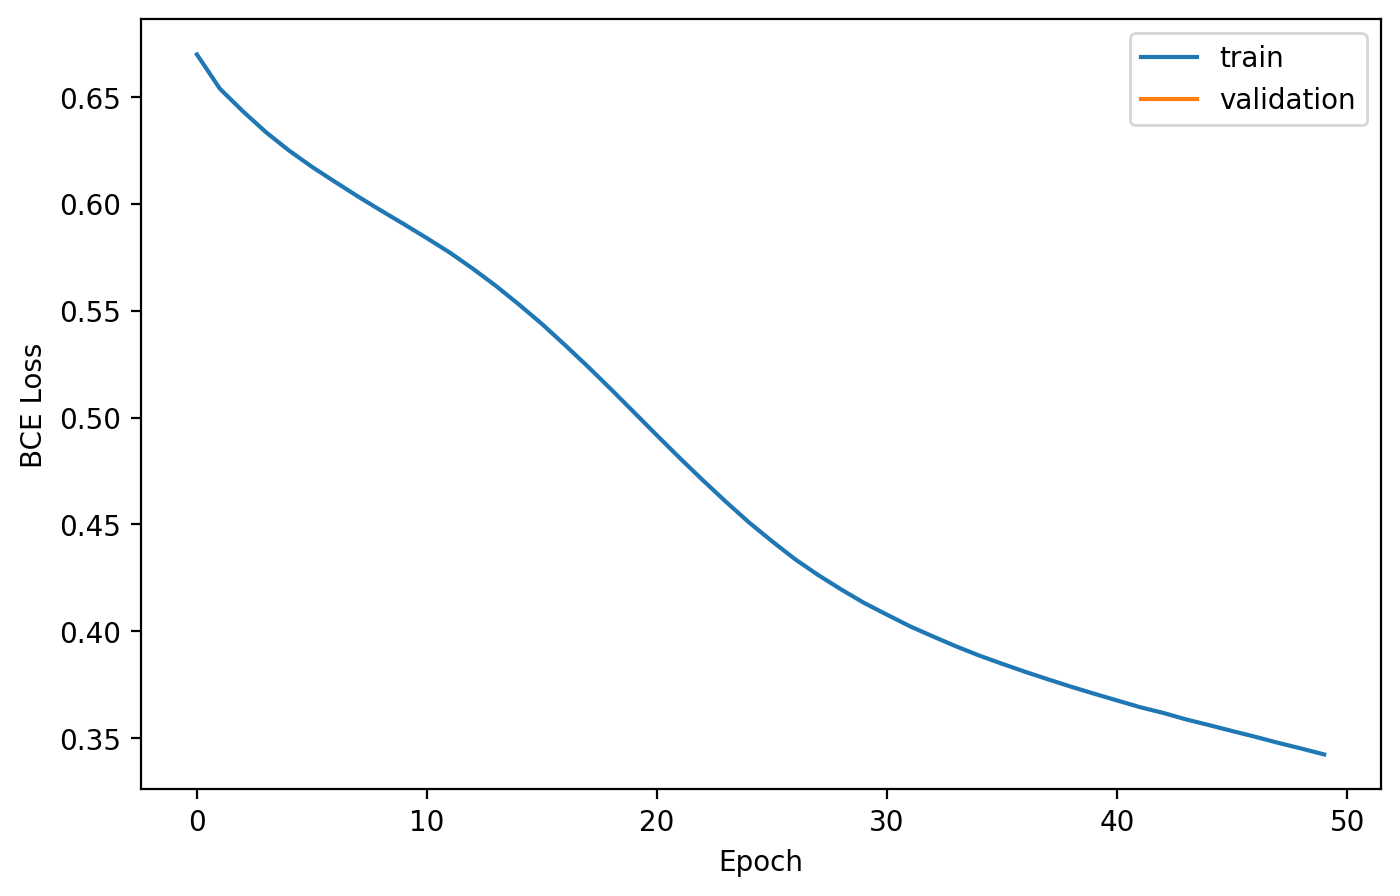

In [129]:
# plot performance by epoch
plt.figure(figsize=(8,5))
plt.plot(history_train_loss, label="train")
plt.plot(history_val_loss, label="validation")
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.legend()
plt.show()

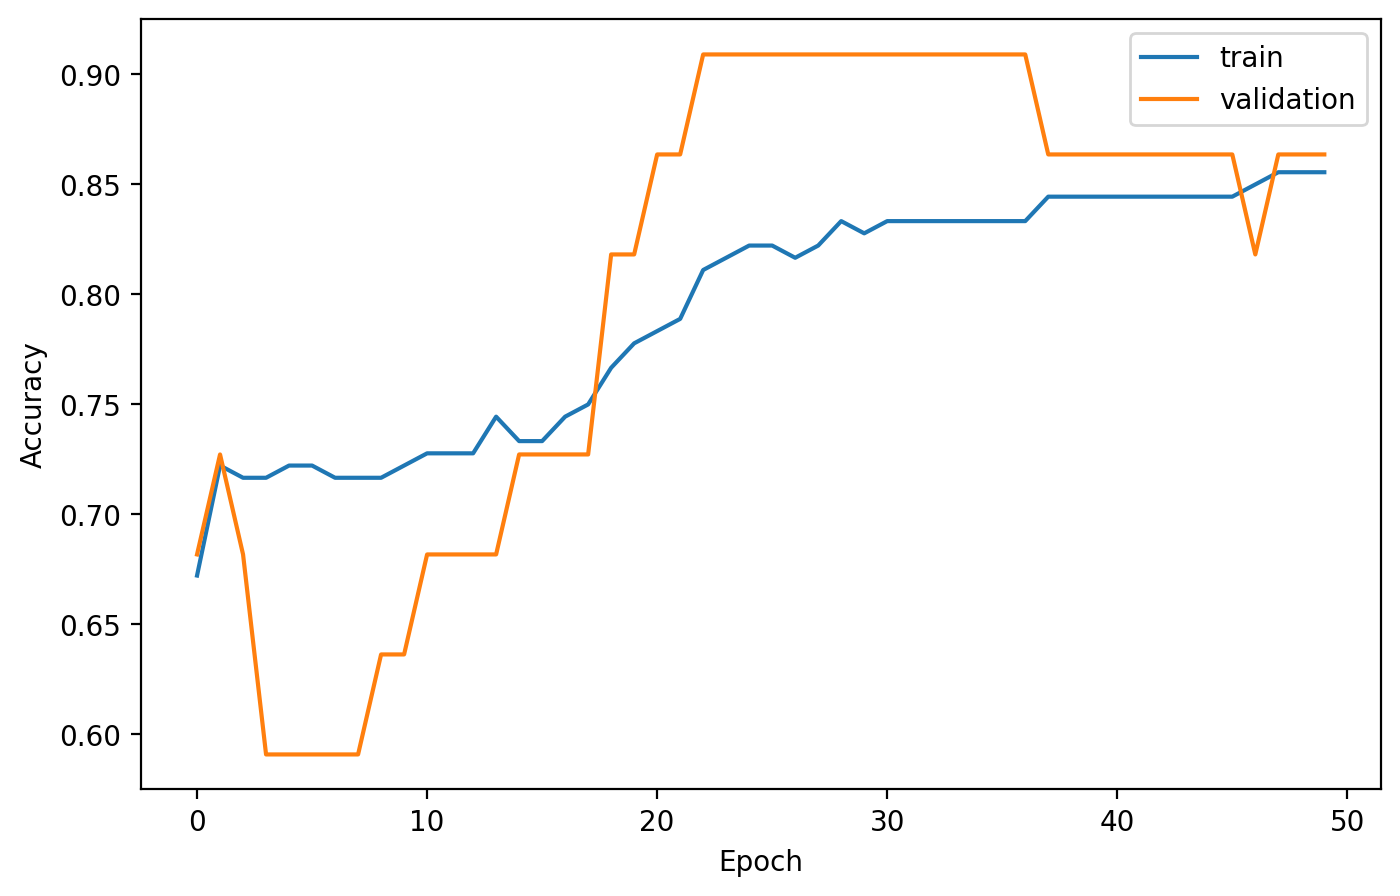

In [130]:
# plot performance by epoch
plt.figure(figsize=(8,5))
plt.plot(history_train_acc, label="train")
plt.plot(history_val_acc, label="validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Multiclass Classification

In [131]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [132]:
# first we need to one-hot encode our target variable
y_onehot = nn.functional.one_hot(torch.tensor(iris.target), num_classes=len(np.unique(iris.target)))
# transform to float (relevant for computing the loss)
y_onehot = y_onehot.to(torch.float)
y_onehot.shape

torch.Size([150, 3])

In [134]:
# split our data
X_train, X_test, y_train, y_test = train_test_split(iris.data, y_onehot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Size of training data {X_train.shape}")
print(f"Size of validation data {X_val.shape}")
print(f"Size of test data {X_test.shape}")

Size of training data (120, 4)
Size of validation data (15, 4)
Size of test data (15, 4)


In [135]:
# before bulding the model we will transform all our data to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)

Since our target variable is a **categorical variable** we need to be carefully when defining the following components of our network:

- \# output neurons: \# classes
- output activation function: softmax
- loss function: CrossEntropy

In [136]:
# we define our model as a sequence of steps
model = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=100),
    nn.ReLU(),
    nn.Linear(100, 75),
    nn.ReLU(),
    nn.Linear(75, 3)
)

In [137]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=75, bias=True)
  (3): ReLU()
  (4): Linear(in_features=75, out_features=3, bias=True)
)


In [138]:
#pip install torchsummary
from torchsummary import summary
summary(model, X.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 225, 100]             500
              ReLU-2             [-1, 225, 100]               0
            Linear-3              [-1, 225, 75]           7,575
              ReLU-4              [-1, 225, 75]               0
            Linear-5               [-1, 225, 3]             228
Total params: 8,303
Trainable params: 8,303
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.61
Params size (MB): 0.03
Estimated Total Size (MB): 0.64
----------------------------------------------------------------


In [139]:
# can our model handle our data?
random_results = model(X_train)
random_results.shape

torch.Size([120, 3])

In [140]:
# define the loss function (https://pytorch.org/docs/stable/nn.html#loss-functions)
# and the optimizer (https://pytorch.org/docs/stable/optim.html)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), 
                       lr=0.001)

### Training loop

Same logic as before

In [141]:
# create objects for logging
history_val_loss = []
history_train_loss = []
history_val_acc = []
history_train_acc = []

# hold the best model
best_loss = np.inf   # init to infinity
best_weights = None
best_epoch = 0

# set main parameters for training
n_epochs = 10
batch_size = 8

for epoch in range(n_epochs):
    
    for i in range(0, len(X_train), batch_size):
        # take a batch
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()
    

    # evaluate model at end of each epoch
    model.eval()
    
    y_pred_train_probs = model(X_train)
    y_pred_train = np.argmax(y_pred_train_probs.detach().numpy(), axis=1)

    y_pred_val_probs = model(X_val)
    y_pred_val = np.argmax(y_pred_val_probs.detach().numpy(), axis=1)
    
    loss_train = loss_function(y_pred_train_probs, y_train)
    loss_train = float(loss_train)
    history_train_loss.append(loss_train)
    acc_train = accuracy_score(y_pred_train, np.argmax(y_train, axis=1))
    history_train_acc.append(acc_train)

    loss_val = loss_function(y_pred_val_probs, y_val)
    loss_val = float(loss_val)
    history_val.append(loss_val)
    acc_val = accuracy_score(y_pred_val, np.argmax(y_val, axis=1))
    history_val_acc.append(acc_val)

    if loss_val < best_loss:
        best_loss = loss_val
        best_epoch = epoch
        best_weights = copy.deepcopy(model.state_dict())

    # print some information
    if epoch % 1 == 0:
        print(f'Finished epoch {epoch}:')
        print(f'---- Training loss: {np.round(loss_train, 2)}, validation loss: {np.round(loss_val, 2)}')
        print(f'---- Training accuracy: {np.round(acc_train, 2)}, validation accuracy: {np.round(acc_val, 2)}')

Finished epoch 0:
---- Training loss: 0.86, validation loss: 0.82
---- Training accuracy: 0.66, validation accuracy: 0.8
Finished epoch 1:
---- Training loss: 0.69, validation loss: 0.67
---- Training accuracy: 0.8, validation accuracy: 0.87
Finished epoch 2:
---- Training loss: 0.55, validation loss: 0.52
---- Training accuracy: 0.75, validation accuracy: 0.87
Finished epoch 3:
---- Training loss: 0.46, validation loss: 0.43
---- Training accuracy: 0.91, validation accuracy: 0.87
Finished epoch 4:
---- Training loss: 0.4, validation loss: 0.38
---- Training accuracy: 0.94, validation accuracy: 1.0
Finished epoch 5:
---- Training loss: 0.35, validation loss: 0.34
---- Training accuracy: 0.97, validation accuracy: 1.0
Finished epoch 6:
---- Training loss: 0.31, validation loss: 0.3
---- Training accuracy: 0.98, validation accuracy: 1.0
Finished epoch 7:
---- Training loss: 0.27, validation loss: 0.27
---- Training accuracy: 0.98, validation accuracy: 1.0
Finished epoch 8:
---- Training 

In [142]:
best_epoch, best_loss

(9, 0.22313736379146576)

In [143]:
# restore model to its state with the lowest validation loss
model.load_state_dict(best_weights)

<All keys matched successfully>

In [144]:
# can I recover the best CE loss?
y_pred = model(X_val)
mse_val = loss_function(y_pred, y_val)
mse_val = float(mse_val)
mse_val

0.22313736379146576

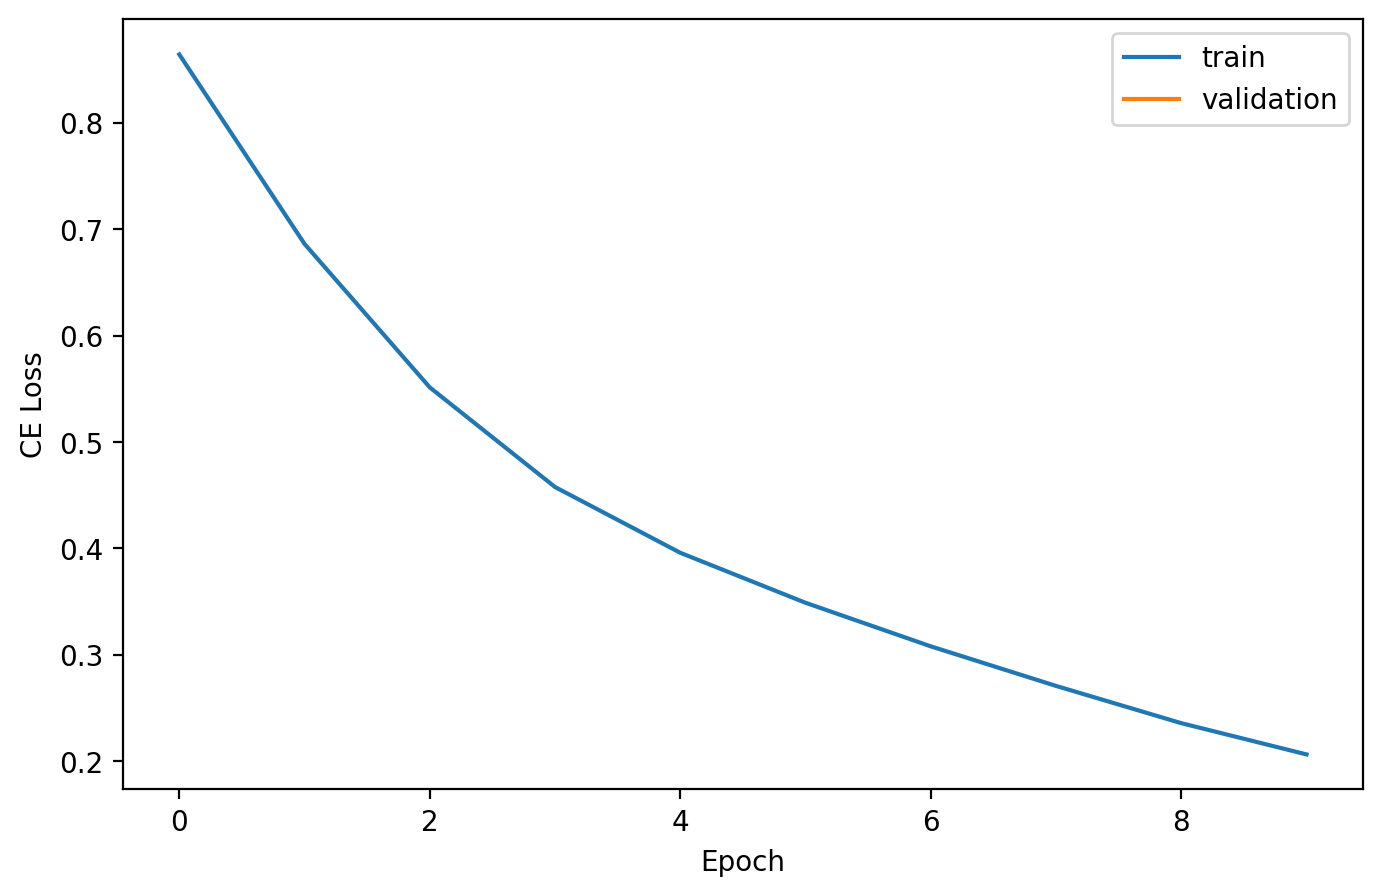

In [145]:
# plot performance by epoch
plt.figure(figsize=(8,5))
plt.plot(history_train_loss, label="train")
plt.plot(history_val_loss, label="validation")
plt.xlabel("Epoch")
plt.ylabel("CE Loss")
plt.legend()
plt.show()

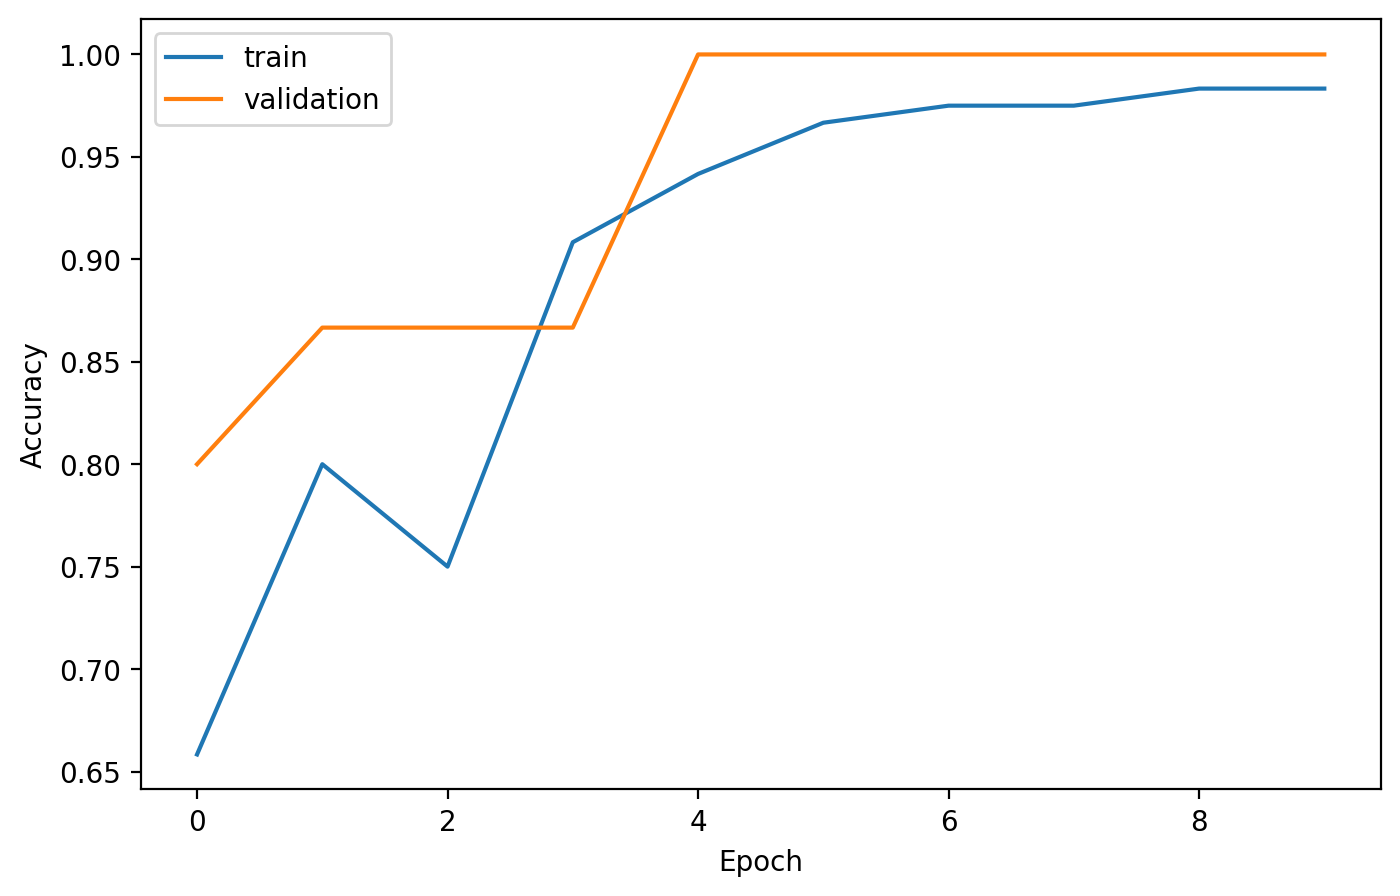

In [146]:
# plot performance by epoch
plt.figure(figsize=(8,5))
plt.plot(history_train_acc, label="train")
plt.plot(history_val_acc, label="validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Machine Learning Classification - Extra Content

### Grid Search CV and Randomized Search CV

One common technique used to select the optimal hyperparameters of a ML model is to compare the CV metrics of models trained with different combinations of these hyperparameters. In the scikit-learn library this idea is implement through the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class. This class **exhaustively** goes over all possible combinations of the hyperparameters specified by the user.

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
# let's load the beer data again
beer_data = pd.read_csv("https://www.dropbox.com/s/5fbmj4gqktrmn00/beers.csv?dl=1")
X, y = beer_data.iloc[:, :-1], beer_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Size of training data {X_train.shape}")
#print(f"Size of validation data {X_val.shape}")
print(f"Size of test data {X_test.shape}")

Size of training data (180, 4)
Size of test data (45, 4)


We need to define the set of parameters that we will combine to train multiple models as a dictionary

In [126]:
parameters = {"penalty": ["l1", "l2", "elasticnet"],
              "C": [1.0, 50.0, 100.0],
              "fit_intercept": [True, False]}

lr_classifier = LogisticRegression(solver="saga",
                                   l1_ratio=0.5) 

In [127]:
clf = GridSearchCV(lr_classifier,
                   parameters,
                   cv=3,
                   scoring="accuracy",
                   error_score="raise")

In [128]:
with warnings.catch_warnings(record=True):
    clf.fit(X_train, y_train)

In [129]:
clf.best_params_

{'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}

In [130]:
# consolidate the grid search cv results as a dataframe
df_results = pd.concat([pd.DataFrame(clf.cv_results_["params"]), pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
df_results

C  fit_intercept     penalty  Accuracy
0     1.0           True          l1  0.872222
1     1.0           True          l2  0.872222
2     1.0           True  elasticnet  0.872222
3     1.0          False          l1  0.750000
4     1.0          False          l2  0.744444
5     1.0          False  elasticnet  0.750000
6    50.0           True          l1  0.844444
7    50.0           True          l2  0.844444
8    50.0           True  elasticnet  0.844444
9    50.0          False          l1  0.750000
10   50.0          False          l2  0.750000
11   50.0          False  elasticnet  0.750000
12  100.0           True          l1  0.844444
13  100.0           True          l2  0.844444
14  100.0           True  elasticnet  0.844444
15  100.0          False          l1  0.750000
16  100.0          False          l2  0.750000
17  100.0          False  elasticnet  0.750000

This approach might be very time consuming and migth also restric the space we can explore. [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) tries to overcome some of these limitations by sampling the parameters to be scored through CV from the distributions given by the user.

In [131]:
from sklearn.model_selection import RandomizedSearchCV
import scipy

In [132]:
params_dists = {"C": scipy.stats.uniform(loc=0, scale=100),
                "penalty": ["l1", "l2", "elasticnet"],  # when we provide a list of options the algorithm samples uniformly among options
                "fit_intercept": [True, False]
                }

In [133]:
clf = RandomizedSearchCV(lr_classifier, params_dists,
                         n_iter=10, # number of parameter settings sampled
                         random_state=90)

In [134]:
with warnings.catch_warnings(record=True):
    clf.fit(X_train, y_train)

In [135]:
clf.best_params_

{'C': 12.629840209929476, 'fit_intercept': True, 'penalty': 'elasticnet'}

In [136]:
# consolidate the grid search cv results as a dataframe
df_results = pd.concat([pd.DataFrame(clf.cv_results_["params"]), pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
df_results

C  fit_intercept     penalty  Accuracy
0  15.305420           True          l1  0.844444
1  40.984214           True  elasticnet  0.844444
2  78.851783          False  elasticnet  0.755556
3  40.383269          False  elasticnet  0.750000
4  12.629840           True  elasticnet  0.861111
5  39.088299           True          l1  0.844444
6  19.435019          False          l1  0.755556
7  82.563080           True  elasticnet  0.844444
8  53.337014          False  elasticnet  0.750000
9  12.997341           True          l2  0.861111

### Linear SVM

Support-Vector Machine (SVM) classifier tries to separate two classes with a line by **finding data points (support vectors) lying closest to the separation plane**. These points determine separation plane (weights and threshold/intercept).

The weights are learned such that the **margin between support vectors of different classes is maximized**.

Like in linear regression the classification is based on a weighted sum of the features (and margin maximization corresponds to minimization of the regularization penalty). 

Analogously to the Nearest Neighbors method the data points (support vectors) decide the class of a new data sample.

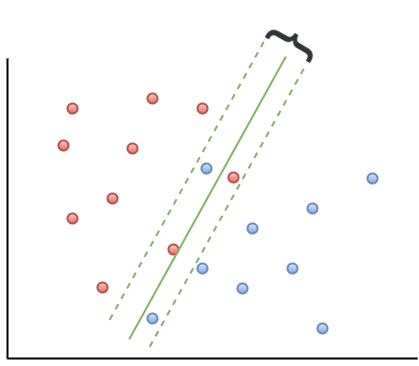

#### Demonstration: linear separable data

In [137]:
df = pd.read_csv('https://www.dropbox.com/s/teu84r9g8jxmwka/line_separable_2d.csv?dl=1')
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

classifier = LinearSVC(C=1)
classifier.fit(X_train, y_train)
print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

train score: 98.67%
test score: 96.00%


feature weights: [[0.15856454 1.01077086]]


With C=100

train score: 100.00%
test score: 92.00%
feature weights: [[0.81571149 8.45145885]]


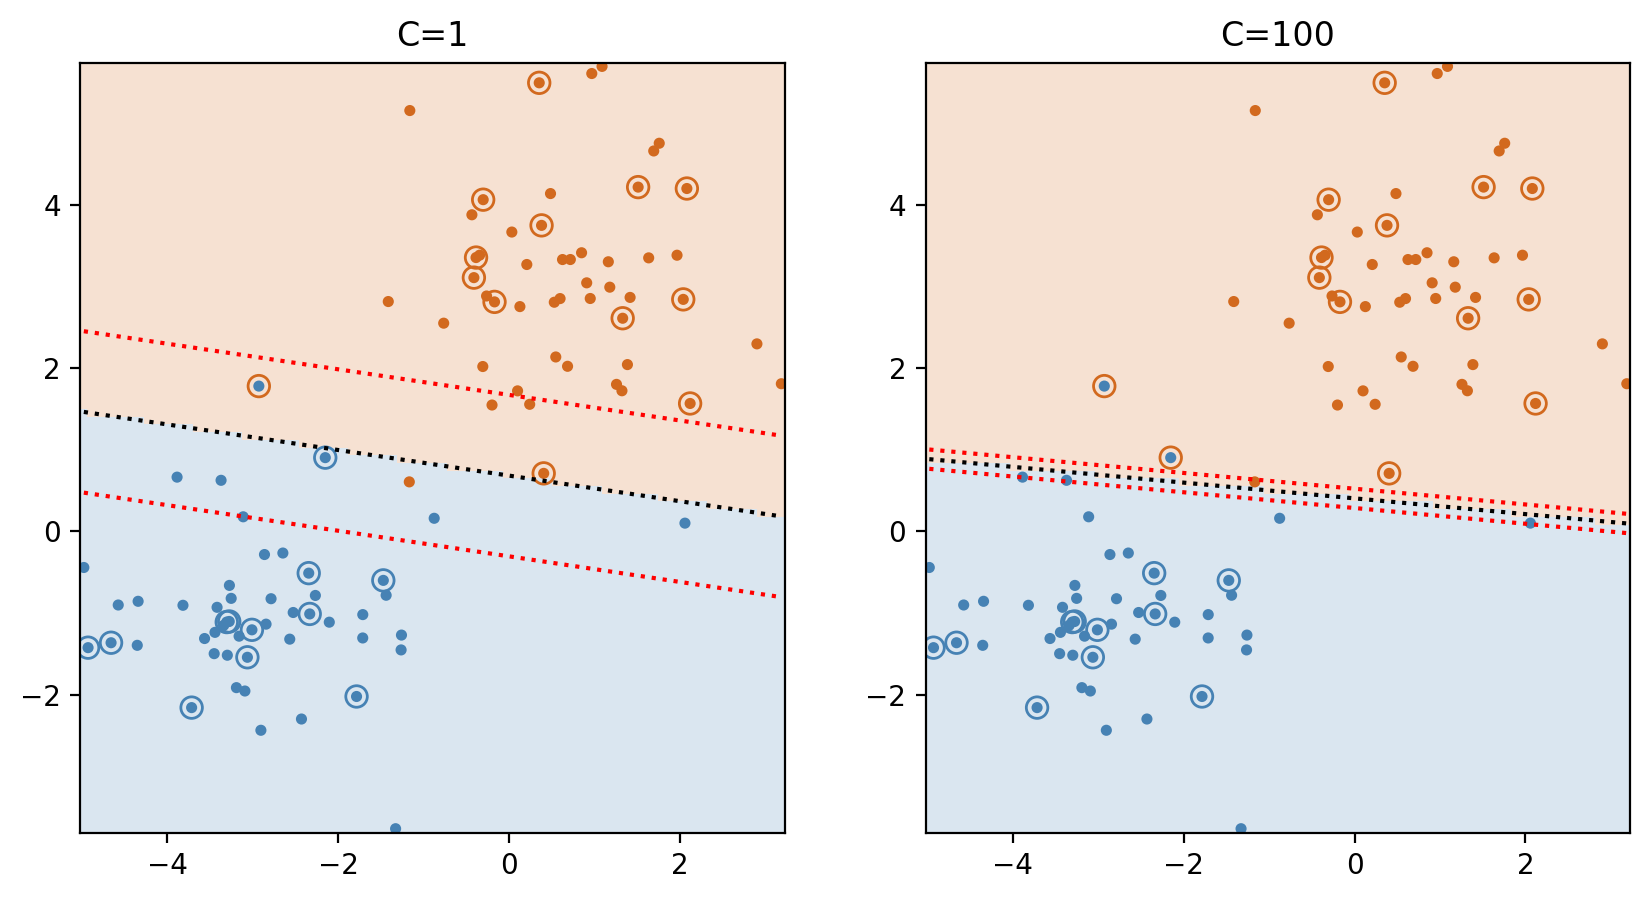

In [138]:
with warnings.catch_warnings(record=True):
        
    fig, ax_arr = plt.subplots(ncols=2, nrows=1, figsize=(2*5, 5))
    y_pred = classifier.predict(X_test)                                                    
    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_pred,
        plt=ax_arr[0],
        title='C=1', 
    )

    print("feature weights:", classifier.coef_)

    def plot_margins(features_2d, linear_classifier, plt=plt):
        '''Plot a separation line and margin lines for 2D dataset'''
        
        assert hasattr(linear_classifier, 'coef_') 
        
        w = linear_classifier.coef_[0]
        b = -linear_classifier.intercept_ # NOTE: intercept = negative threshold

        # separation line: w[0] * x + w[1] * y - b == 0
        feat_x = features_2d.iloc[:, 0]
        x = np.linspace(np.min(feat_x), np.max(feat_x), 2)
        y =  (b - w[0] * x) / w[1]
        plt.plot(x, y, color='k', linestyle=':');

        # margin lines: w[0] * x + w[1] * y - b == +/-1
        y =  ((b - 1) - w[0] * x) / w[1]
        plt.plot(x, y, color='r', linestyle=':');
        y =  ((b + 1) - w[0] * x) / w[1]
        plt.plot(x, y, color='r', linestyle=':');

    plot_margins(features_2d, classifier, plt=ax_arr[0])


    print()
    print()
    print('With C=100')
    print()
                                                        
    # higher C = more narrow ("harder") margin
    # Note: increase max iterations 50x for solver's convergence
    classifier = LinearSVC(C=100, max_iter=50000)
    classifier.fit(X_train, y_train)
    print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
    print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))
    print("feature weights:", classifier.coef_)
    y_pred = classifier.predict(X_test)  
    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_pred,
        plt=ax_arr[1],
        title='C=100', 
    )
    plot_margins(features_2d, classifier, plt=ax_arr[1]);

#### Demonstration: circle data

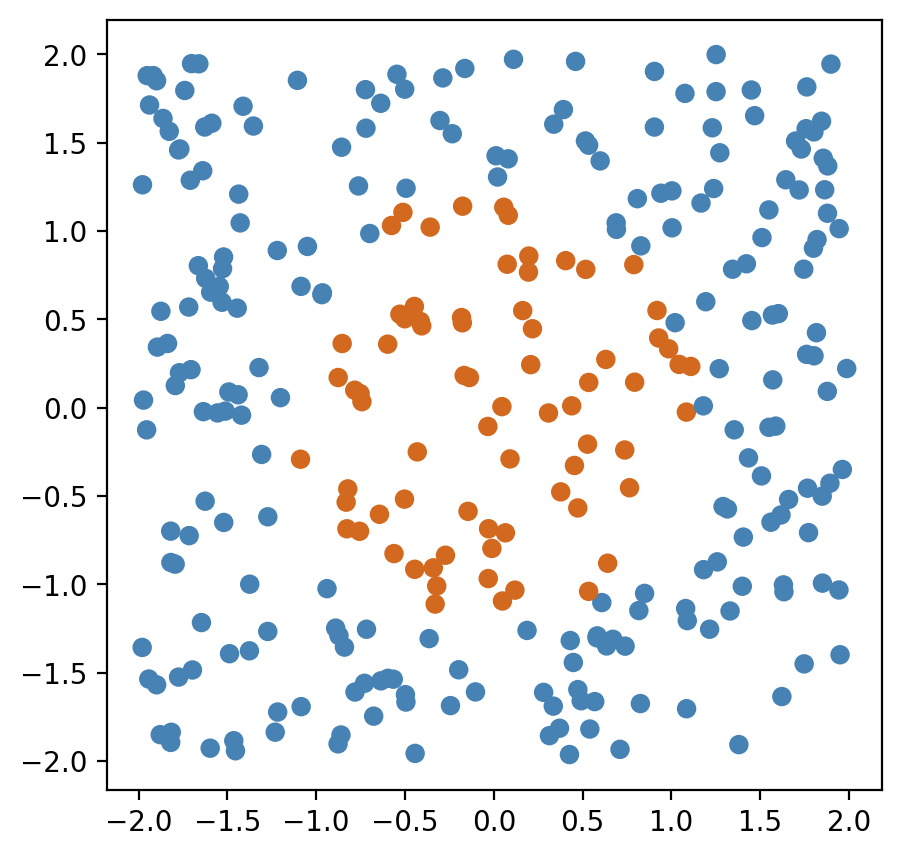

In [139]:
df = pd.read_csv('https://www.dropbox.com/s/apaqf6rfasgw4fv/circle.csv?dl=1')
features_2d = df.loc[:, ("x", "y")]
labelv = df["label"]

plt.figure(figsize=(5, 5))
plt.scatter(features_2d.iloc[:,0], features_2d.iloc[:,1], color=samples_color(labelv));

score: 81.33%
feature weights: [[-0.00751369 -0.01536179]]


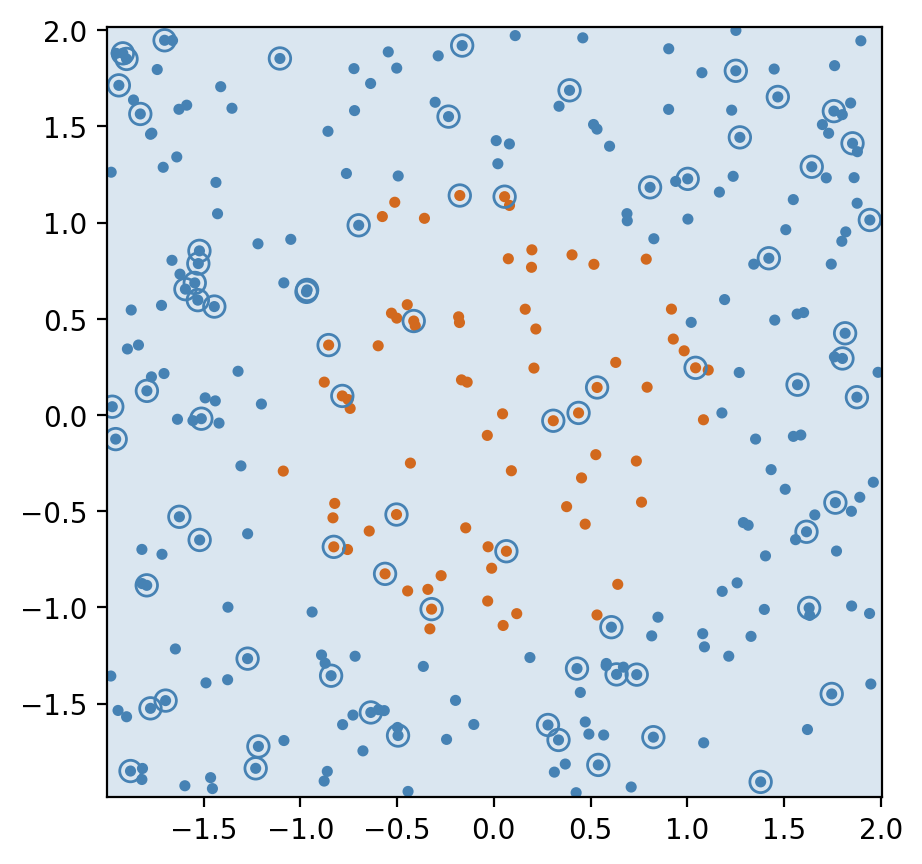

In [140]:
with warnings.catch_warnings(record=True):

    from sklearn.svm import LinearSVC
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

    classifier = LinearSVC()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

    plt.figure(figsize=(5, 5))
    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test.iloc[:,:2], test_labels=y_pred,
    )

    print("feature weights:", classifier.coef_)

### Kernel based SVM
Data is usually not at all linearily separable.

train score: 98.67%
test score: 96.00%
#support vectors: [130  51]


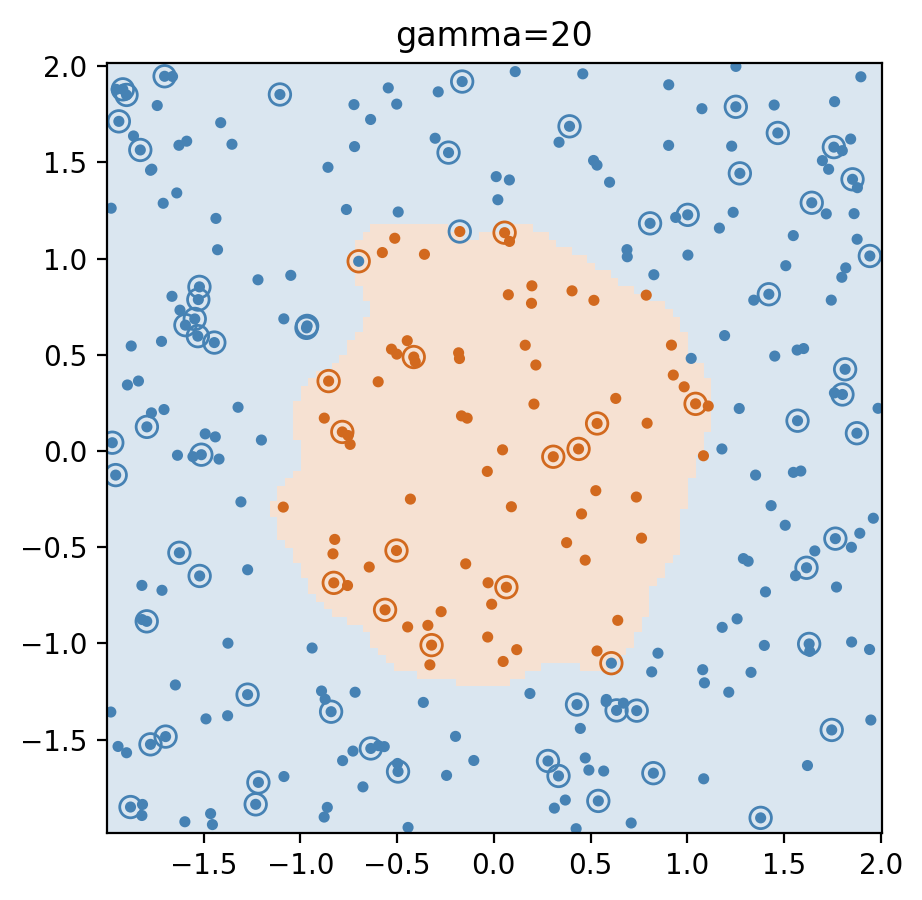

In [141]:
with warnings.catch_warnings(record=True):

    from sklearn.svm import SVC

    X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

    # specify kernel and gamma
    classifier = SVC(kernel='rbf', gamma=20)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    print('train score: {:.2f}%'.format(100*classifier.score(X_train, y_train)))
    print('test score: {:.2f}%'.format(100*classifier.score(X_test, y_test)))

    # NOTE: mapping is implicit - feature weights are not there anymore (coef_);
    #       instead we have only support vectors (and their weights; dual_coef_).
    #
    # Let's just see how many of samples are used as support vectors for each class.
    print('#support vectors:', classifier.n_support_)

    plt.figure(figsize=(5, 5))
    plot_decision_surface(
        features_2d, labelv, classifier,
        test_features_2d=X_test, test_labels=y_pred,
        title='gamma=20',
    )

The `gamma` parameter controls both size and *smoothness* of the decision surface.

**`gamma` parameter is crucial for a good performance!**

<div class="alert alert-block alert-warning">

<p><i class="fa fa-warning"></i>&nbsp;
Before using <strong>kernel SVM</strong> you need to <strong>scale (normalize) your features first</strong>. This is because it relies on the "similarity"/"distance" function. Otherwise, kernel SVM might not work well.</p>
    
</div>

#### How to choose `gamma`?

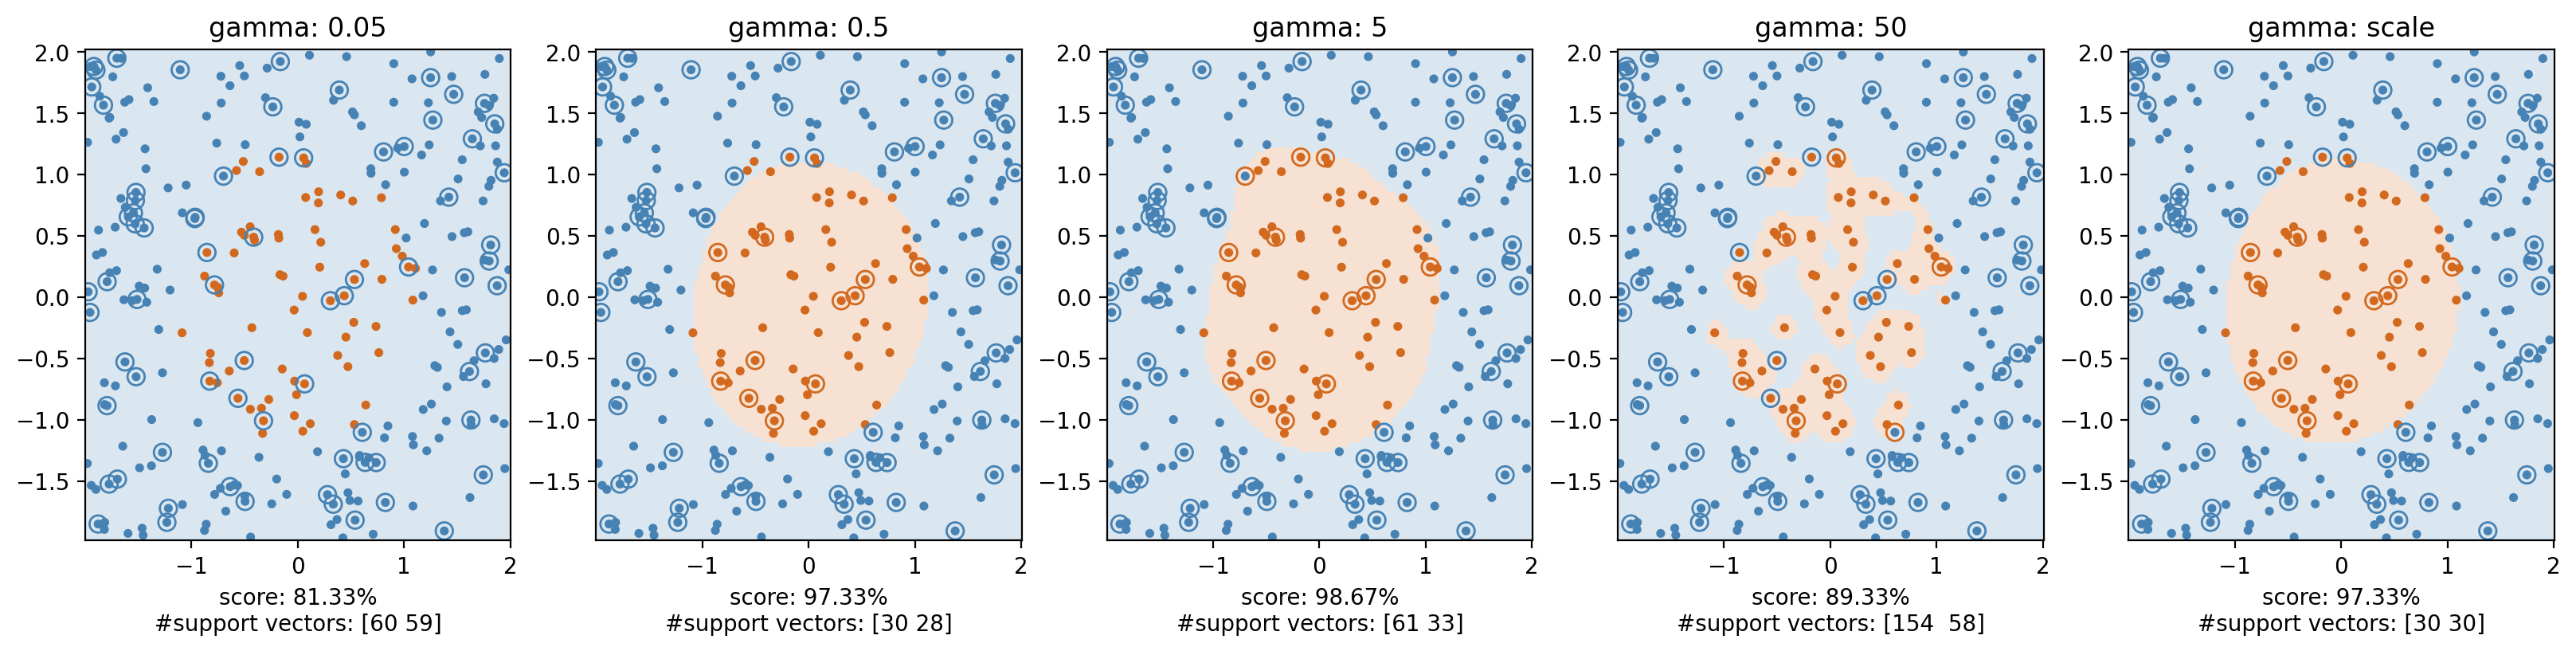

In [142]:
with warnings.catch_warnings(record=True):

    kernel = 'rbf'
    gammas = [0.05, 0.5, 5, 50, 'scale',]

    n = len(gammas)
    m = 1
    fig, ax_arr = plt.subplots(ncols=n, nrows=m, figsize=(4*n, 4*m))

    for i, gamma in enumerate(gammas):
        classifier = SVC(kernel=kernel, gamma=gamma)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        iax = ax_arr[i]
        iax.set_title("gamma: " + str(gamma))
        iax.set_xlabel(
            'score: {:.2f}%\n#support vectors: {}'.format(
                100*classifier.score(X_test, y_test),
                classifier.n_support_,
            )
        )

        plot_decision_surface(
            features_2d, labelv, classifier,
            test_features_2d=X_test, test_labels=y_pred,
            plt=iax,
        )


#### Which kernels do work?

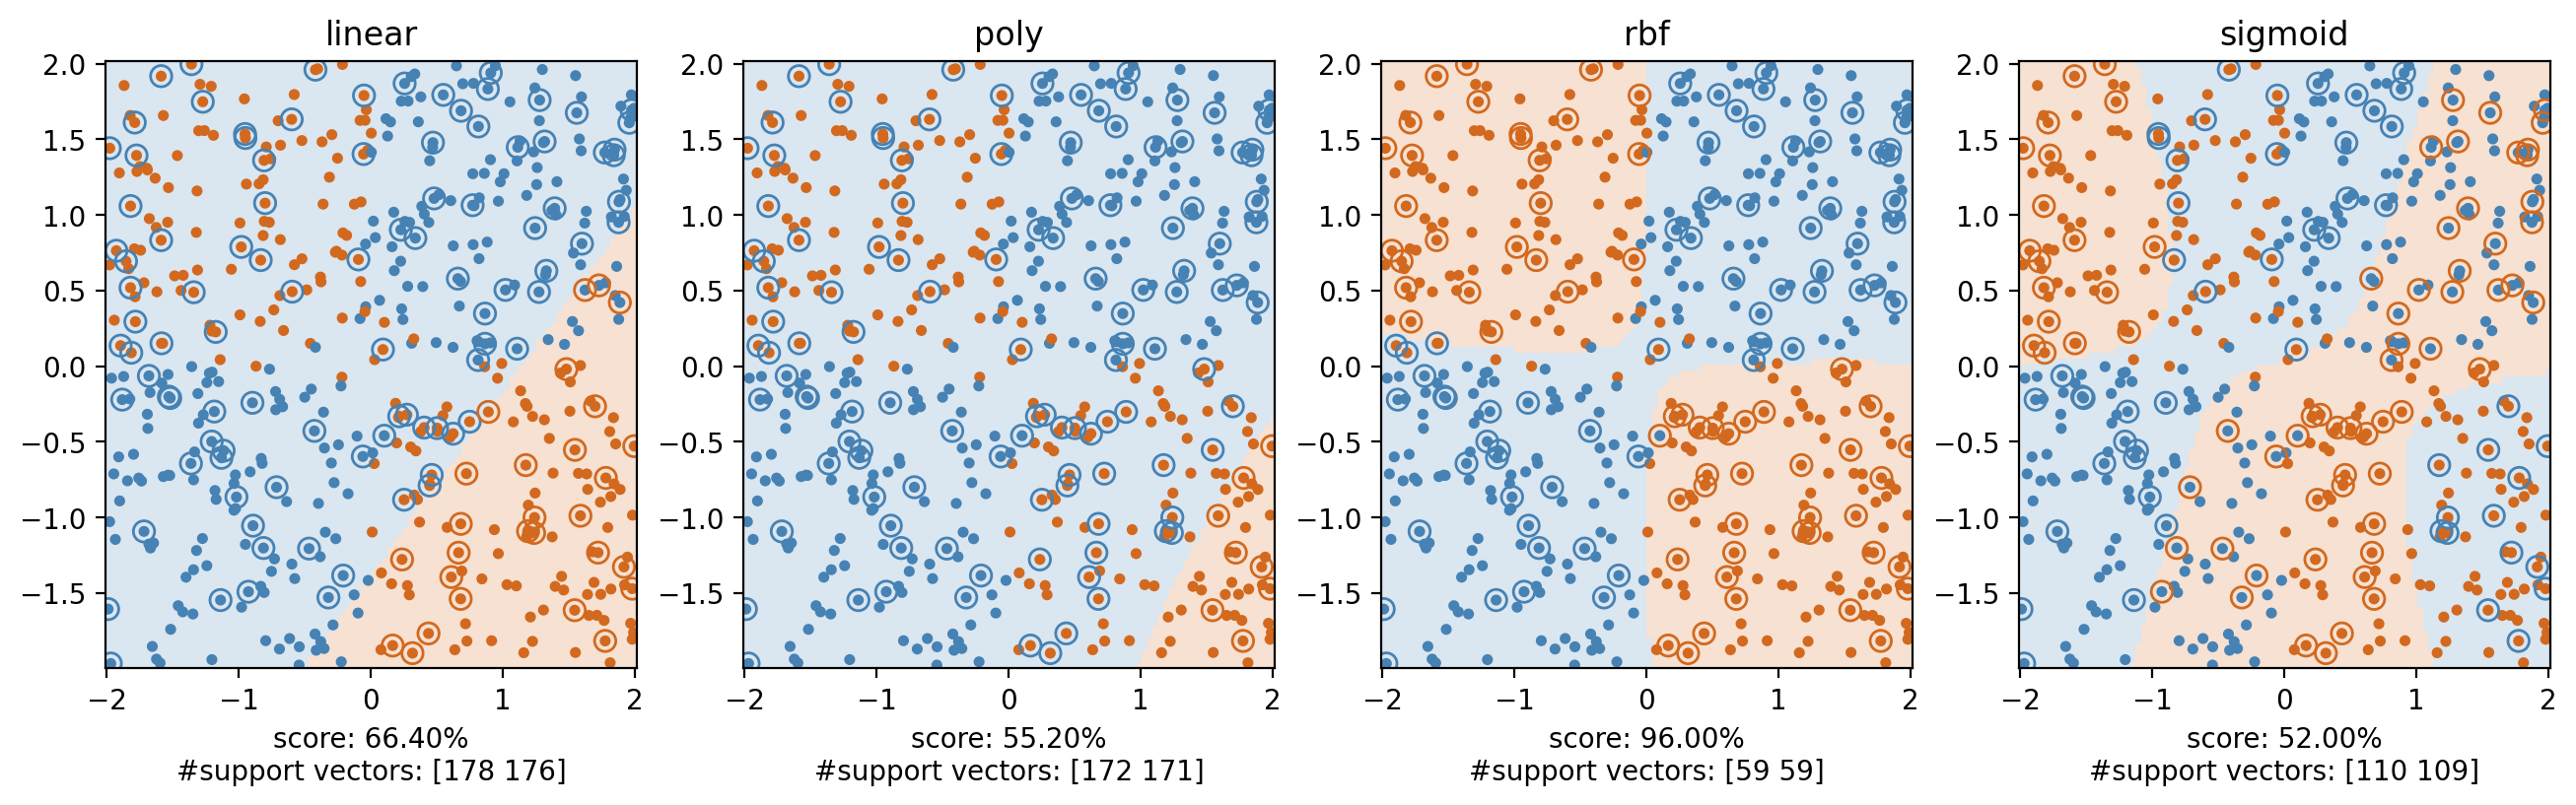

In [143]:
with warnings.catch_warnings(record=True):

    kernels = ['linear', 'poly', 'rbf', 'sigmoid',]

    df = pd.read_csv('https://www.dropbox.com/s/lzc6qjbrled40ht/xor.csv?dl=1')
    features_2d = df.loc[:, ("x", "y")]
    labelv = df["label"]

    X_train, X_test, y_train, y_test = train_test_split(features_2d, labelv, random_state=0)

    kernels = ['linear', 'poly', 'rbf', 'sigmoid',]
    gamma = 'scale'

    n = len(kernels)
    m = 1
    fig, ax_arr = plt.subplots(ncols=n, nrows=m, figsize=(4*n, 4*m))

    for j, kernel in enumerate(kernels):
        classifier = SVC(kernel=kernel, gamma='scale')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        iax = ax_arr[j]
        iax.set_title(kernel)
        iax.set_xlabel(
            'score: {:.2f}%\n#support vectors: {}'.format(
                100*classifier.score(X_test, y_test),
                classifier.n_support_,
            )
        )

        plot_decision_surface(
            features_2d, labelv, classifier,
            test_features_2d=X_test, test_labels=y_pred,
            plt=iax,
        )


# Deep Learning - Extra Content

During backpropagation the algorithm computes the gradient of the cost function w.r.t each parameter and it uses these gradients to update each parameter with a Gradient Descent step. <br>

<b>Vanishing gradient problem:</b> gradients often get smaller and smaller as the algorithm progresses down to the lower layers $\implies$ lower layers connection weights remain virtually unchanged. <br>

<b>Exploding gradient problem:</b> gradients grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges.

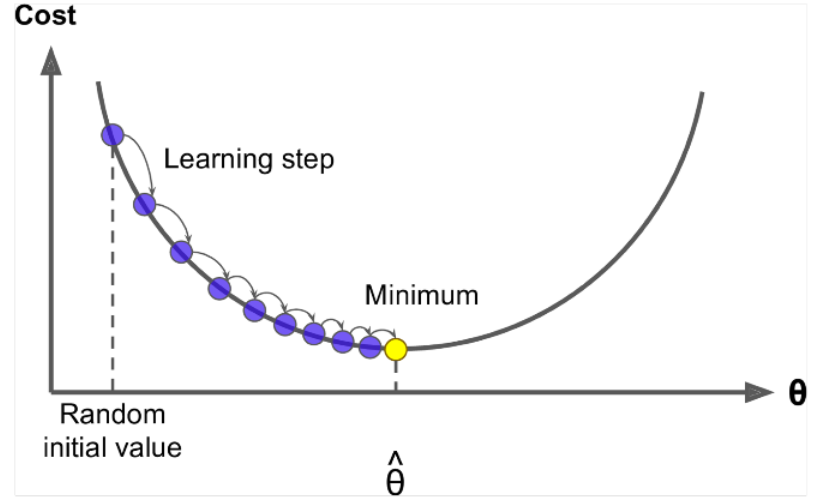

### Initializers

**Problems:**

- Initial weights too large $\implies$ Exploding Gradient
- Initial weights too small $\implies$ Vanishing Gradient
- Correlated (collinear) initial weights $\implies$ Backpropagation cannot distinguish their contribution to the output error

**Solution:** Initialization of neuron weights should be random *but* you can choose the distribution (standard practice is to use "Glorot" and "HeNormal", which alleviate the problem of unstable gradients).

In [144]:
# re-load the housing data
df = pd.DataFrame(raw_data.data, columns=raw_data['feature_names'])
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [145]:
X, y = df.iloc[:,:], raw_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# before bulding the model we will transform all our data to tensors
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

In [146]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, X):
      super().__init__()
      # define all the components of the NN
      self.linear1 = nn.Linear(in_features=X.shape[1], out_features=50)
      torch.nn.init.xavier_uniform_(self.linear1.weight) # Glorot initialization! 
      self.act1 = nn.ReLU() 
      self.linear2 = nn.Linear(in_features=50, out_features=1)
      self.act2 = nn.Sigmoid()

    # define how to transform the input
    def forward(self, X):
        X = self.act1(self.linear1(X))
        output = self.act2(self.linear2(X))
        return output

In [147]:
# initialize the model
model = MyNeuralNetwork(X_train)

In [148]:
# inspect the initialized weigths
model.linear1.weight[0]

tensor([-0.3165,  0.0996, -0.3036,  0.0872,  0.0322, -0.1303, -0.1353, -0.0381],
       grad_fn=<SelectBackward0>)

In [149]:
# can our model handle our data?
random_results = model.forward(X_train)
random_results.shape

torch.Size([16512, 1])

### Batch Normalization

**Problem:** Distribution of weights is likely to change at every step of backpropagation $\implies$ slower and less efficient model.

**Solution:** after each layer normalize the inputs to have mean zero and variance 1. It helps to increase performance, speed up training, and regularize the model.

In [152]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, X):
      super().__init__()
      # define all the components of the NN
      self.linear1 = nn.Linear(in_features=X.shape[1], out_features=50)
      torch.nn.init.xavier_uniform_(self.linear1.weight) # Glorot initialization!
      self.normalize1 = nn.BatchNorm1d(50)   # apply batch normalization
      self.act1 = nn.ReLU()
      self.linear2 = nn.Linear(in_features=50, out_features=1)
      self.act2 = nn.Sigmoid()

    # define how to transform the input
    def forward(self, X):
        X = self.act1(self.linear1(X))
        X_normalized = self.normalize1(X)
        output = self.act2(self.linear2(X_normalized))
        return output

In [153]:
# initialize the model
model = MyNeuralNetwork(X_train)

# can our model handle our data?
random_results = model.forward(X_train)
random_results.shape

torch.Size([16512, 1])

### Alternative Activation Functions

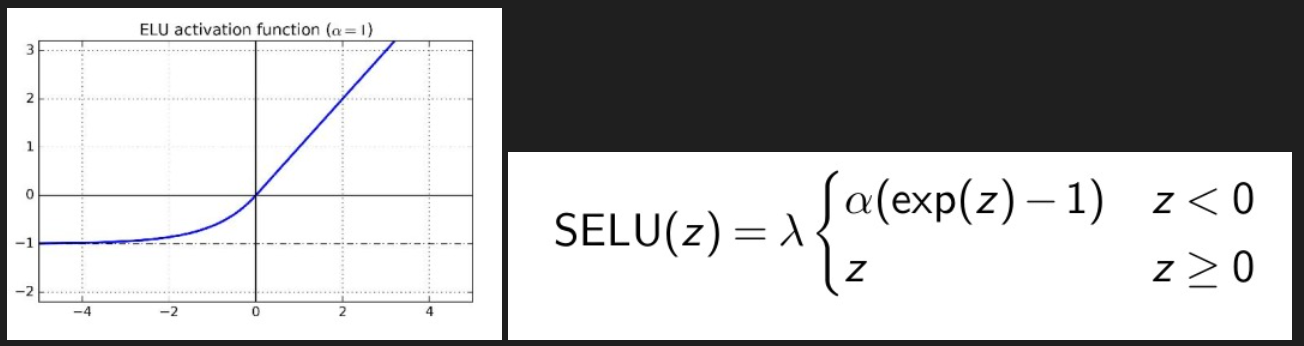

Exponential Linear Unit (ELU) and Scaled ELU (SELU). In particular, SELU enhances the performance of the network, that is a neural network with only dense layers, each using SELU as activation function, the network will self-normalize, provided that:
- inputs are standardized
- it uses LeCun normal initialization for weights
- set $\lambda \approx 1.0507$ and $\alpha \approx 1.6732$
- in general SELU > ELU > ReLU

Note that with SELU batch normalization is not needed as the newtwork self-normalizes

In [154]:
nn.ELU(alpha=1)
nn.SELU()

SELU()

### Optimizer 

Existing research showed that it has a big impact on the performance of the model. <i>Adam</i> (adaptive moment estimation) is faster and almost as good as <i>sgd</i>. But there are multiple options available.

In [155]:
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer_adam = optim.Adam(model.parameters(), lr=0.0001)
optimizer_adamw = optim.AdamW(model.parameters(), lr=0.0001)

### Regularization and Dropout

Neural network parameters, like regressions, can be regularized with L1 and/or L2 penalties to push weak neurons to zero and create a sparse model $\rightarrow$ avoid overfitting.

In PyTorch, a simple way to add regularization is through the weight decay parameter of the optimizer.

In [156]:
optimizer_adam = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5) 

Alternatively, use <i>dropout</i> during training (it is NOT used during validation), with probability ($p$) between 10% and 50%. Alternative dropout regularizations are:
- Normal dropout: neurons don't get dropped but coefficients are down-weighted by $p$
- Monte Carlo dropout: continues to allow dropout but produce 100 predictions, and averages them

In [157]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, X):
      super().__init__()
      self.linear1 = nn.Linear(in_features=X.shape[1], out_features=50)
      torch.nn.init.xavier_uniform_(self.linear1.weight) # Glorot initialization
      self.normalize1 = nn.BatchNorm1d(50)   # apply batch normalization
      self.dropout1 = nn.Dropout(p=0.3)
      self.act1 = nn.ReLU()
      self.linear2 = nn.Linear(in_features=50, out_features=1)
      self.act2 = nn.Sigmoid()

    def forward(self, X):
        X = self.act1(self.linear1(X))
        X_normalized = self.normalize1(X)
        X = self.dropout1(X)
        output = self.act2(self.linear2(X_normalized))
        return output

In [158]:
# can our model handle our data?
random_results = model.forward(X_train)
random_results.shape

torch.Size([16512, 1])

## Tuning NN Hyperparameters

It is an active area of research. One option is to try combinations of hyperparameters and see which one works best on the validation set, using GridSearchCV or RandomizedSearchCV

In [159]:
# install first
# pip install skorch
from skorch import NeuralNet

In [160]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, X, n_neurons):
      super().__init__()
      self.linear1 = nn.Linear(in_features=X.shape[1], out_features=n_neurons)
      torch.nn.init.xavier_uniform_(self.linear1.weight) # Glorot initialization
      self.normalize1 = nn.BatchNorm1d(n_neurons)   # apply batch normalization
      self.dropout1 = nn.Dropout(p=0.3)
      self.act1 = nn.ReLU()
      self.linear2 = nn.Linear(in_features=n_neurons, out_features=1)
      self.act2 = nn.Sigmoid()

    def forward(self, X):
        X = self.act1(self.linear1(X))
        X_normalized = self.normalize1(X)
        X = self.dropout1(X)
        output = self.act2(self.linear2(X_normalized))
        return output

In [161]:
# create the skorch wrapper
model = NeuralNet(
    module=MyNeuralNetwork(X_train, n_neurons=50),  # neural network architecture
    criterion=nn.MSELoss()   # loss function
)

In [162]:
print(model.initialize())

<class 'skorch.net.NeuralNet'>[initialized](
  module_=MyNeuralNetwork(
    (linear1): Linear(in_features=8, out_features=50, bias=True)
    (normalize1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dropout1): Dropout(p=0.3, inplace=False)
    (act1): ReLU()
    (linear2): Linear(in_features=50, out_features=1, bias=True)
    (act2): Sigmoid()
  ),
)


In [163]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [164]:
params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 20],
    "module__X": [X_train],
    'module__n_neurons': [10, 50, 100],
}

gs = GridSearchCV(model, params, refit=False, cv=3, scoring='neg_mean_squared_error', verbose=1)
gs

GridSearchCV(cv=3,
             estimator=<class 'skorch.net.NeuralNet'>[initialized](
  module_=MyNeuralNetwork(
    (linear1): Linear(in_features=8, out_features=50, bias=True)
    (normalize1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dropout1): Dropout(p=0.3, inplace=False)
    (act1): ReLU()
    (linear2): Linear(in_features=50, out_features=1, bias=True)
    (...
        [   3.8125,   49.0000,    4.4735,  ...,    1.7381,   33.7700,
         -118.1600],
        [   4.1563,    4.0000,    5.6458,  ...,    2.7232,   34.6600,
         -120.4800],
        ...,
        [   2.9344,   36.0000,    3.9867,  ...,    3.3321,   34.0300,
         -118.3800],
        [   5.7192,   15.0000,    6.3953,  ...,    3.1789,   37.5800,
         -121.9600],
        [   2.5755,   52.0000,    3.4026,  ...,    2.1087,   37.7700,
         -122.4200]])],
                         'module__n_neurons': [10, 50, 100]},
             refit=False, scoring='neg_mean_squared_error', verbose=1)

In [165]:
gs.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        3.6349        3.2197  0.4013
      2        3.1818        2.8635  0.3041
      3        2.8984        2.6600  0.1426
      4        2.7422        2.5507  0.1282
      5        2.6575        2.4902  0.1454
      6        2.6092        2.4544  0.1296
      7        2.5797        2.4318  0.1426
      8        2.5605        2.4166  0.1229
      9        2.5473        2.4058  0.1199
     10        2.5378        2.3980  0.1448
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        3.4852        3.2605  0.1246
      2        3.1555        2.9988  0.1271
      3        2.9414        2.8330  0.1126
      4        2.8049        2.7292  0.1198
      5        2.7189        2.6639  0.1304
      6        2.6645        2.6217  0.1181
      7        2.6289        2.5936  0.1351
      8        

GridSearchCV(cv=3,
             estimator=<class 'skorch.net.NeuralNet'>[initialized](
  module_=MyNeuralNetwork(
    (linear1): Linear(in_features=8, out_features=50, bias=True)
    (normalize1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dropout1): Dropout(p=0.3, inplace=False)
    (act1): ReLU()
    (linear2): Linear(in_features=50, out_features=1, bias=True)
    (...
        [   3.8125,   49.0000,    4.4735,  ...,    1.7381,   33.7700,
         -118.1600],
        [   4.1563,    4.0000,    5.6458,  ...,    2.7232,   34.6600,
         -120.4800],
        ...,
        [   2.9344,   36.0000,    3.9867,  ...,    3.3321,   34.0300,
         -118.3800],
        [   5.7192,   15.0000,    6.3953,  ...,    3.1789,   37.5800,
         -121.9600],
        [   2.5755,   52.0000,    3.4026,  ...,    2.1087,   37.7700,
         -122.4200]])],
                         'module__n_neurons': [10, 50, 100]},
             refit=False, scoring='neg_mean_squared_error', verbose=1)

In [166]:
gs.best_score_

-2.492409865061442

In [167]:
gs.best_params_

{'lr': 0.02,
 'max_epochs': 20,
 'module__X': tensor([[   3.2596,   33.0000,    5.0177,  ...,    3.6918,   32.7100,
          -117.0300],
         [   3.8125,   49.0000,    4.4735,  ...,    1.7381,   33.7700,
          -118.1600],
         [   4.1563,    4.0000,    5.6458,  ...,    2.7232,   34.6600,
          -120.4800],
         ...,
         [   2.9344,   36.0000,    3.9867,  ...,    3.3321,   34.0300,
          -118.3800],
         [   5.7192,   15.0000,    6.3953,  ...,    3.1789,   37.5800,
          -121.9600],
         [   2.5755,   52.0000,    3.4026,  ...,    2.1087,   37.7700,
          -122.4200]]),
 'module__n_neurons': 10}

In [168]:
param_distribs = {
    "lr": reciprocal(3e-4, 3e-2),
    "module__n_neurons": np.arange(1, 100),
    "module__X": [X_train]
}

rnd_search_cv = RandomizedSearchCV(estimator=model, param_distributions=param_distribs, n_iter=10, 
                                   refit=False, scoring='neg_mean_squared_error', verbose=1)
rnd_search_cv

RandomizedSearchCV(estimator=<class 'skorch.net.NeuralNet'>[initialized](
  module_=MyNeuralNetwork(
    (linear1): Linear(in_features=8, out_features=50, bias=True)
    (normalize1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dropout1): Dropout(p=0.3, inplace=False)
    (act1): ReLU()
    (linear2): Linear(in_features=50, out_features=1, bias=True)...
                                        'module__n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   refit=False, scoring='neg_mean_squared_error', verbose=1)

In [169]:
rnd_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        3.2990        2.9619  0.2194
      2        2.7902        2.7093  0.1960
      3        2.6150        2.5878  0.2318


      4        2.5505        2.5479  0.1769
      5        2.5213        2.5256  0.1901
      6        2.5060        2.5122  0.1726
      7        2.4962        2.5060  0.1540
      8        2.4899        2.5005  0.1437
      9        2.4855        2.4999  0.1716
     10        2.4823        2.4954  0.1524
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        3.3076        3.0800  0.1736
      2        2.8353        2.8517  0.1568
      3        2.6654        2.7767  0.1512
      4        2.5980        2.7102  0.1768
      5        2.5650        2.6418  0.1670
      6        2.5420        2.6234  0.1638
      7        2.5276        2.6108  0.1691
      8        2.5163        2.5998  0.2092
      9        2.5079        2.5950  0.1683
     10        2.4990        2.5908  0.1742
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        3.3041        3.0485  0.1457
      2        2.8076        2.8

RandomizedSearchCV(estimator=<class 'skorch.net.NeuralNet'>[initialized](
  module_=MyNeuralNetwork(
    (linear1): Linear(in_features=8, out_features=50, bias=True)
    (normalize1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dropout1): Dropout(p=0.3, inplace=False)
    (act1): ReLU()
    (linear2): Linear(in_features=50, out_features=1, bias=True)...
                                        'module__n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   refit=False, scoring='neg_mean_squared_error', verbose=1)

In [170]:
rnd_search_cv.best_params_

{'lr': 0.016097753230597586,
 'module__X': tensor([[   3.2596,   33.0000,    5.0177,  ...,    3.6918,   32.7100,
          -117.0300],
         [   3.8125,   49.0000,    4.4735,  ...,    1.7381,   33.7700,
          -118.1600],
         [   4.1563,    4.0000,    5.6458,  ...,    2.7232,   34.6600,
          -120.4800],
         ...,
         [   2.9344,   36.0000,    3.9867,  ...,    3.3321,   34.0300,
          -118.3800],
         [   5.7192,   15.0000,    6.3953,  ...,    3.1789,   37.5800,
          -121.9600],
         [   2.5755,   52.0000,    3.4026,  ...,    2.1087,   37.7700,
          -122.4200]]),
 'module__n_neurons': 69}

However, this approach is quite time consuming, thus, allows you to test only a few combinations of hyperparameters. Some suggestions:
- It is better to have too many layers, and use regularization
- Try between 1 and 5 layers
- Adding layers usually helps more than adding neurons
- Using ReLU in hidden layers is a good baseline